In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/пп/Spotify.csv'))

# EDA, ресерч, Feature Engineering

##Предобработка данных

посмотрим на данные которые у нас есть, что они из себя представляют. какие-то изменим для большего удобства. столбцы, которые ни как не вляют на выживаемость удалим: track_id, artists, track_name, album_name.

track_id — индекс трека.

artists — имя исполнителя.

album_name — название альбома, в который входит трек.

track_name — назвние трека.

popularity — уровень популярности трека.

duration_ms — длительность воспроизведения трека в миллисекундах.

explicit — наличие нецензурной лексики.

danceability — мера того, насколько трек подходит для танцев.

energy — уровень энергии трека.

key — ключ трека.

loudness — общая громкость трека в децибелах (дБ).

mode — модальность трека (1 — major, 0 — minor).

speechiness — наличие в треке произнесённых слов.

acousticness — акустика трека.

instrumentalness — вероятность того, что трек будет инструментальным.

liveness — мера присутствия живой аудитории в треке.

valence — музыкальная позитивность или счастье, которые передаёт трек.

tempo — темп трека в ударах в минуту (BPM).

time_signature — временная сигнатура трека.

track_genre — жанр или жанры, с которыми связан трек.


In [4]:
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
df.describe(include='all')

Unnamed: 0                track_id      artists  \
count   114000.000000                  114000       113999   
unique            NaN                   89741        31437   
top               NaN  6S3JlDAGk3uu3NtZbPnuhS  The Beatles   
freq              NaN                       9          279   
mean     56999.500000                     NaN          NaN   
std      32909.109681                     NaN          NaN   
min          0.000000                     NaN          NaN   
25%      28499.750000                     NaN          NaN   
50%      56999.500000                     NaN          NaN   
75%      85499.250000                     NaN          NaN   
max     113999.000000                     NaN          NaN   

                        album_name       track_name     popularity  \
count                       113999           113999  114000.000000   
unique                       46589            73608            NaN   
top     Alternative Christmas 2022  Run Rudolph Run            NaN   
freq                           195              151            NaN   
mean                           NaN              NaN      33.238535   
std                            NaN              NaN      22.305078   
min                            NaN              NaN       0.000000   
25%                            NaN              NaN      17.000000   
50%                            NaN              NaN      35.000000   
75%                            NaN              NaN      50.000000   
max                            NaN              NaN     100.000000   

         duration_ms explicit   danceability         energy  ...  \
count   1.140000e+05   114000  114000.000000  114000.000000  ...   
unique           NaN        2            NaN            NaN  ...   
top              NaN    False            NaN            NaN  ...   
freq             NaN   104253            NaN            NaN  ...   
mean    2.280292e+05      NaN       0.566800       0.641383  ...   
std     1.072977e+05      NaN       0.173542       0.251529  ...   
min     0.000000e+00      NaN       0.000000       0.000000  ...   
25%     1.740660e+05      NaN       0.456000       0.472000  ...   
50%     2.129060e+05      NaN       0.580000       0.685000  ...   
75%     2.615060e+05      NaN       0.695000       0.854000  ...   
max     5.237295e+06      NaN       0.985000       1.000000  ...   

             loudness           mode    speechiness   acousticness  \
count   114000.000000  114000.000000  114000.000000  114000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -8.258960       0.637553       0.084652       0.314910   
std          5.029337       0.480709       0.105732       0.332523   
min        -49.531000       0.000000       0.000000       0.000000   
25%        -10.013000       0.000000       0.035900       0.016900   
50%         -7.004000       1.000000       0.048900       0.169000   
75%         -5.003000       1.000000       0.084500       0.598000   
max          4.532000       1.000000       0.965000       0.996000   

        instrumentalness       liveness        valence          tempo  \
count      114000.000000  114000.000000  114000.000000  114000.000000   
unique               NaN            NaN            NaN            NaN   
top                  NaN            NaN            NaN            NaN   
freq                 NaN            NaN            NaN            NaN   
mean            0.156050       0.213553       0.474068     122.147837   
std             0.309555       0.190378       0.259261      29.978197   
min             0.000000       0.000000       0.000000       0.000000   
25%             0.000000       0.098000       0.260000      99.218750   
50%             0.000042       0.132000       0.464000     122.017000   
75%             0.049000       0.2730

Проверим данные на дубликаты и пропуски.

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

пропусков всего 3 в не самых значительных столбцах, поэтому просто удалим их

In [9]:
df = df.dropna()

удаляем не нужные столбцы, которые ни как не вляют на популярность музыки и не понадобятся при анализе

In [10]:
df = df.drop(labels = ['track_id', 'artists', 'track_name', 'album_name'], axis = 1)

проверим категориальные данные на выбросы

In [11]:
df['key'].value_counts()

key
7     13244
0     13061
2     11644
9     11313
1     10772
5      9368
11     9282
4      9008
6      7921
10     7456
8      7360
3      3570
Name: count, dtype: int64

In [12]:
df['time_signature'].value_counts()

time_signature
4    101842
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64

выбросов в категориальных данных не оказалось

проверим числовые данные на выбросы

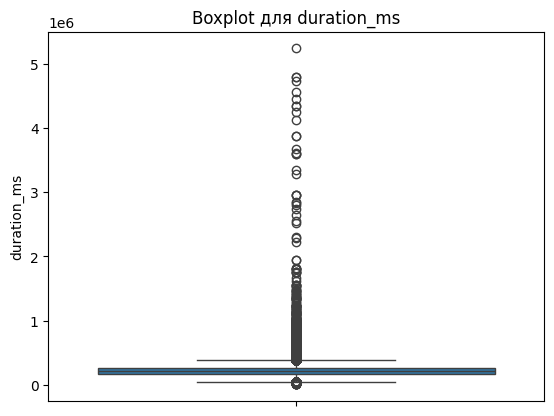

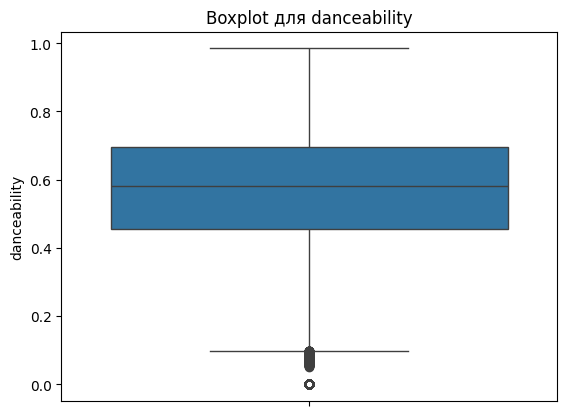

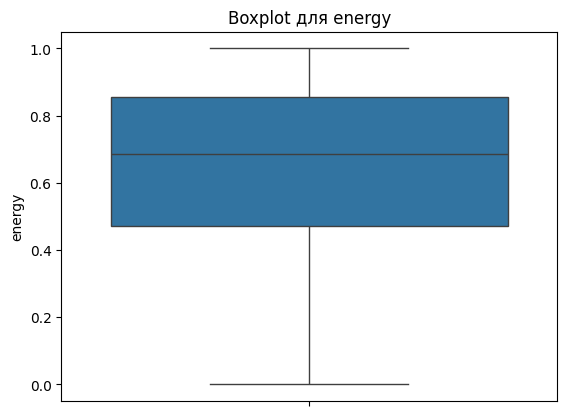

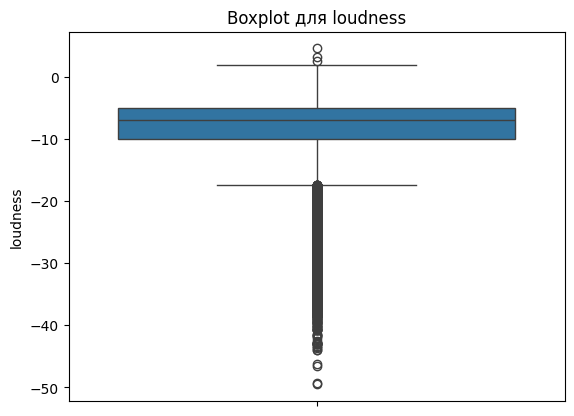

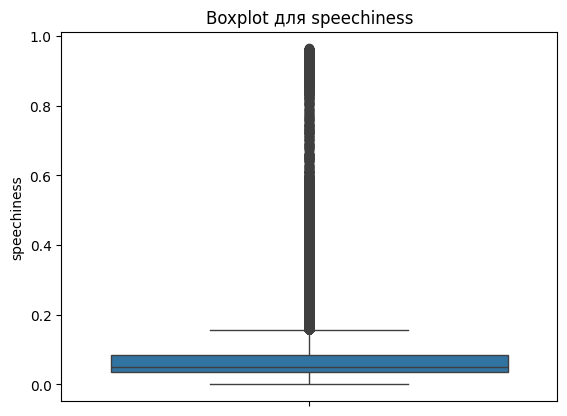

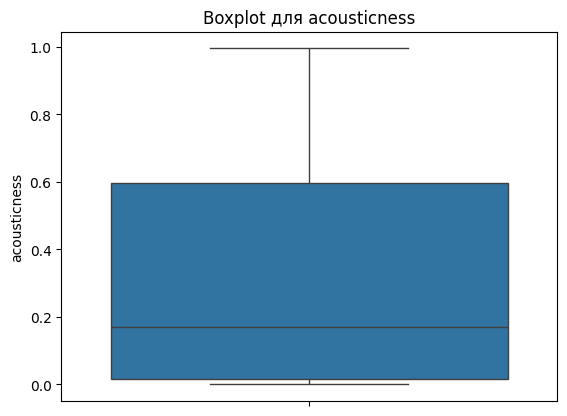

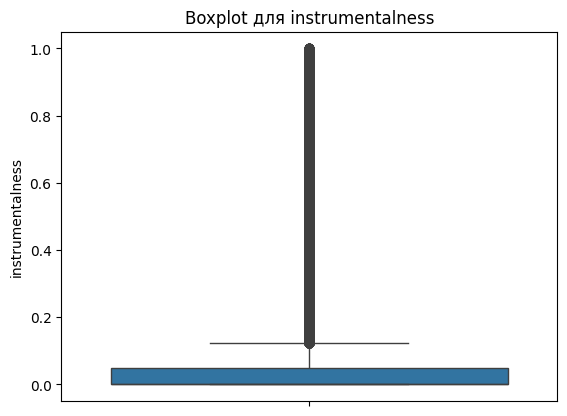

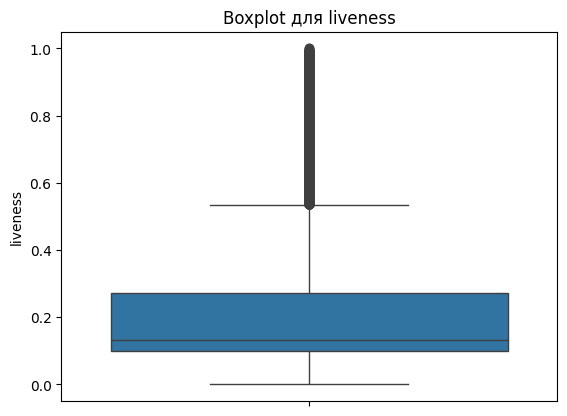

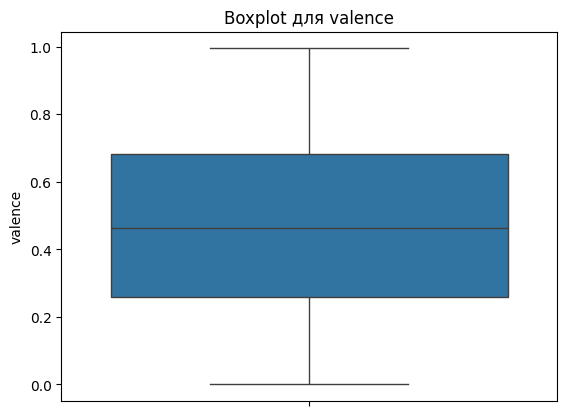

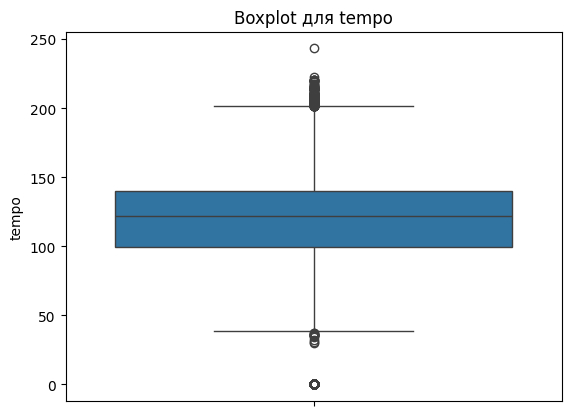

In [13]:
numeric_cols = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for col in numeric_cols:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot для {col}')
    plt.show()

У числовых данных сложно сказать, что является выбросом, так как все песни отличаются между собой и могут быть очень тихие или очень медленные песни и т.д., поэтому не будем удалять из датасета данные, которые меньше первого квантила или больше третьего, или трансформировать.

Составим матрицу корреляции, для выдвижения гипотез.

<Axes: >

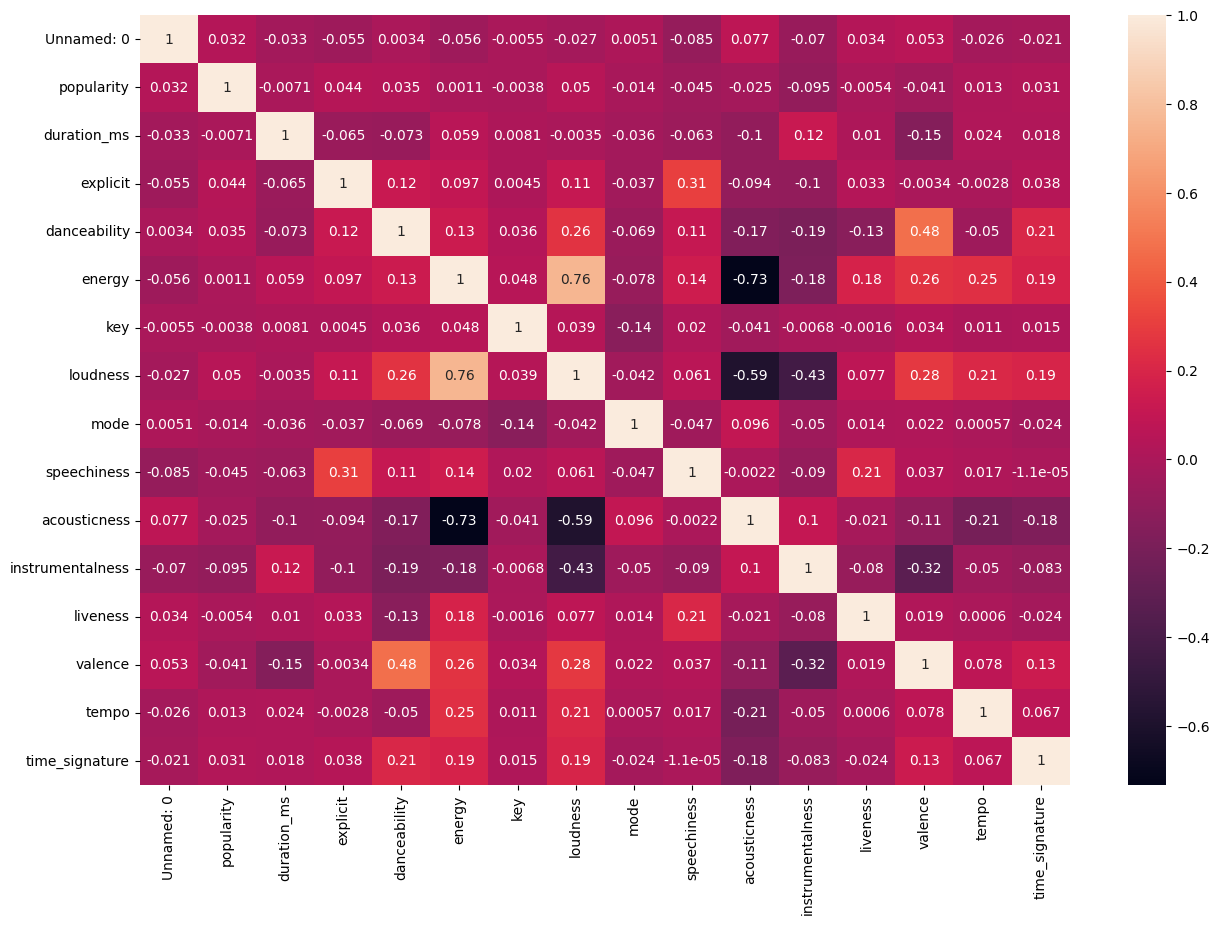

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(columns=['track_genre']).corr(),annot=True)

## Гипотезы

Популярность трека сложно вывести только поимени исполнителя, названию альбома и названию самой песни. несмтря на то, что очень часто трек оказывается популярным и вирусным только из-за известности артиста, сложно не отрицать того факта, что только имени мало. поэтому надо найти закномерности, гипотезы в других данных.
Мои гипотезы:
1. Продолжительность трека. Зачастую треки с длиной окло трех минут становятся популярнее, чем треки с продолжительностью меньше (примерно 1.5 минуты) или больше (примерно 5 минут). Людям либо не интересно слушать небольшие песни, либо надоедает слушать трек более 3-4 минут
2. 18+ текст (explicit). Так как в е-треках зачастую подразумевают "запрещенные" темы или используются нецензурные выражения, то пометка explicit приводит к повышенному интересу слушателя
3. Танцевальность и энергичность. Если под трек можно поставить танец или он будет энергичным, то это может привести к его популярности на площадках по типу TikTok, что приведет к более частым прослушиванием
4. Энергичность. Очень част люди любят энергичную музыку, под кторую мжно быстро двигаться, это может привести к популярности трека
5. Громкость. Зачастую, громкое музыка является так же и энергичной, что может привести в большим прослушиванием
6. Разговрность. Треки имеющие значение выше 0.66 состоят в основном из произнесённых слов, их можно отнести к рэпу, что является доволно популярным жанром в наше время
7. Темп. Из-за увеличения скорости, темпа жизни, люди предпочитают более быстрые треки
8. Жанр. В разное время популярны разные жанры
9. Акустичность. По мнению многих людей акустическая музыка боле приятна слуху, чем электическая
10. Позитивность. Есть мнение, что людям больше нравится слушать более позитивную музыку, которая задает хорее настроение
11. Лад. Мажорные песни считаются более позитивными, поэтому тут вывод как в 10 гипотезе
12. Живой звук. наличие живого звука создает ощущение присуствия, например, на концерте, поэтому многи людям это может больше нравиться
13. Инструментальность. Многие люди предпочитаю больше инструментал песни, чем её саму
14. Сложность трека. Треки с простой структурой чаще становятся популяпными
15. Треки в определенных музыкальных ключах чаще становятся популярными.
16. Временная сигнатура. Треки с временой сигнатурой 4 чаще становятся популярными, так как более привычны слушателям.


### 1 Гипотеза
#### Продолжительность трека

In [15]:
df['duration_ms'] = df['duration_ms'] / 60000

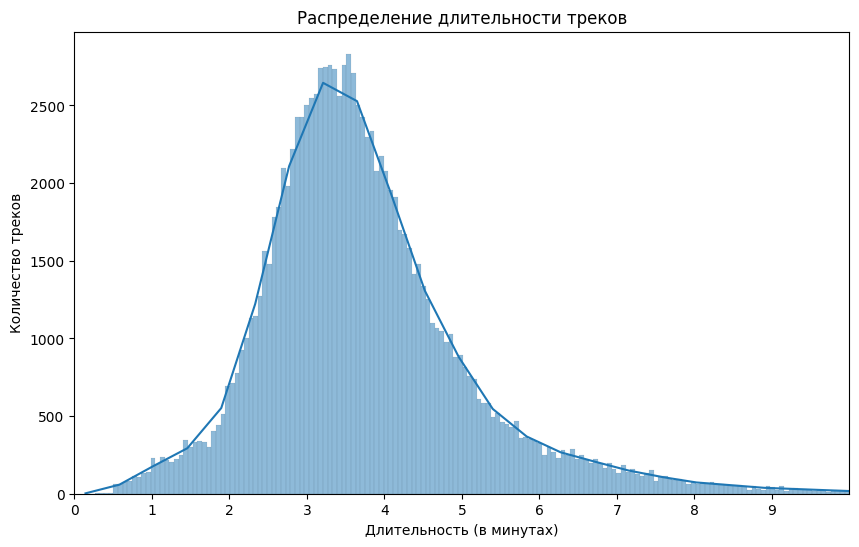

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'], kde=True)
plt.title('Распределение длительности треков')
plt.xlabel('Длительность (в минутах)')
plt.xlim(0, 10)
plt.xticks(np.arange(0, 10, 1))
plt.ylabel('Количество треков')
plt.show()

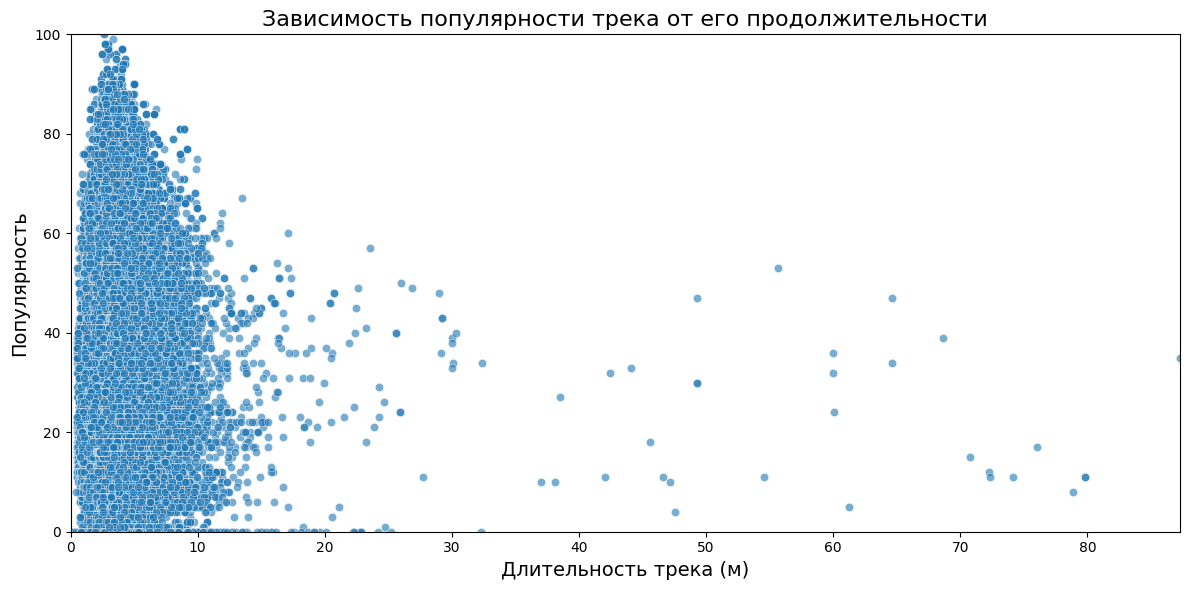

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration_ms', y='popularity', data=df, alpha=0.6)
plt.title('Зависимость популярности трека от его продолжительности', fontsize=16)
plt.xlabel('Длительность трека (м)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xlim(0, df['duration_ms'].max())
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

#### Вывод
Больше всего песен с длительность от двух до 5 минут, что является нормой для песен в наше время.
Из графика мы можем сделать вывод, что больше всего песен с длительность не более двух минут и самыми популярными являются песни с длительностью до минуты.

### 2 Гипотеза
#### 18+ текст

<ipython-input-18-77a2c84e3fae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='explicit', y='popularity', data=df, palette='viridis')


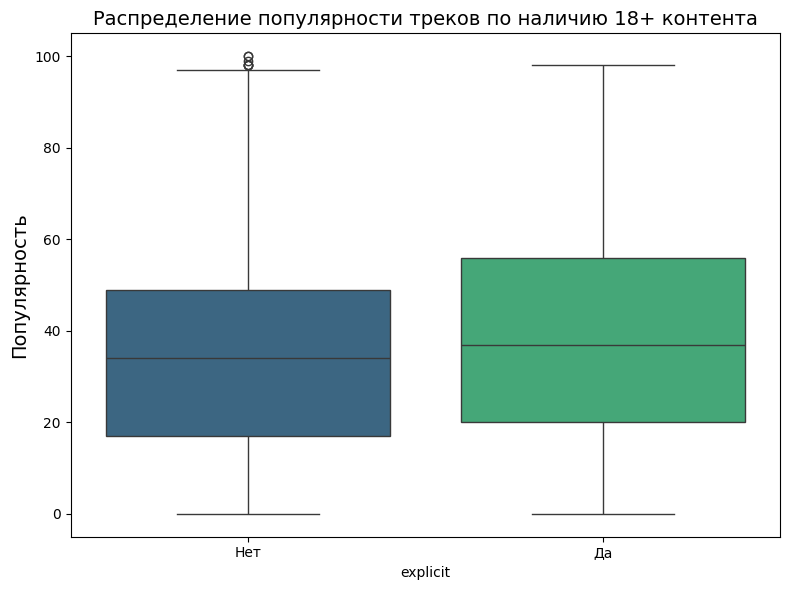

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='explicit', y='popularity', data=df, palette='viridis')
plt.title('Распределение популярности треков по наличию 18+ контента', size=14)
plt.ylabel('Популярность', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'])
plt.tight_layout()
plt.show()

<ipython-input-19-6ef3c5c1ae3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='explicit', y='popularity', data=explicit_popularity, palette='viridis')


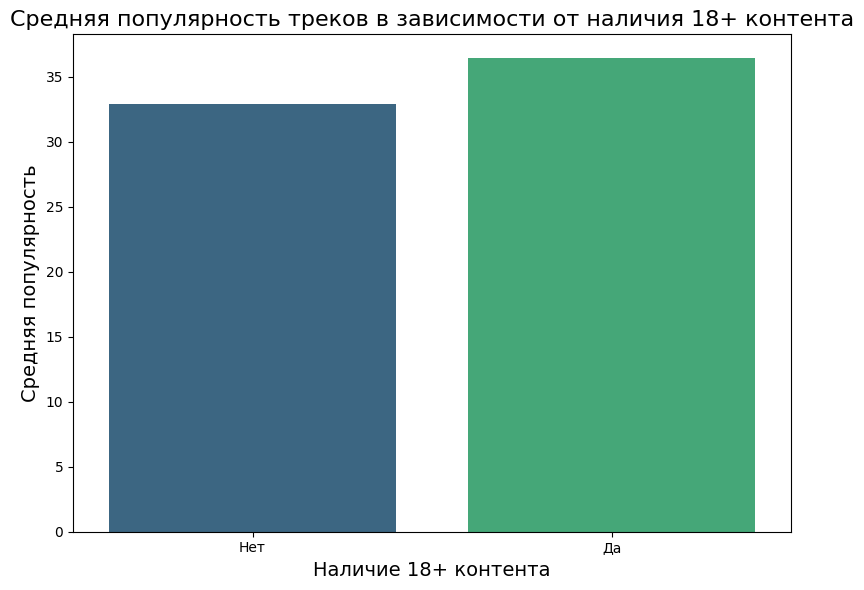

In [19]:
explicit_popularity = df.groupby('explicit')['popularity'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='explicit', y='popularity', data=explicit_popularity, palette='viridis')
plt.title('Средняя популярность треков в зависимости от наличия 18+ контента', fontsize=16)
plt.xlabel('Наличие 18+ контента', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'])
plt.tight_layout()
plt.show()

#### Вывод
Из двух графиков мы можем сделать вывод, что песни без 18+ контента чуть менее популярны, чем песни с ним. Разница минимальна, они на одном уровне

### 3 Гипотеза
#### Танцевальность

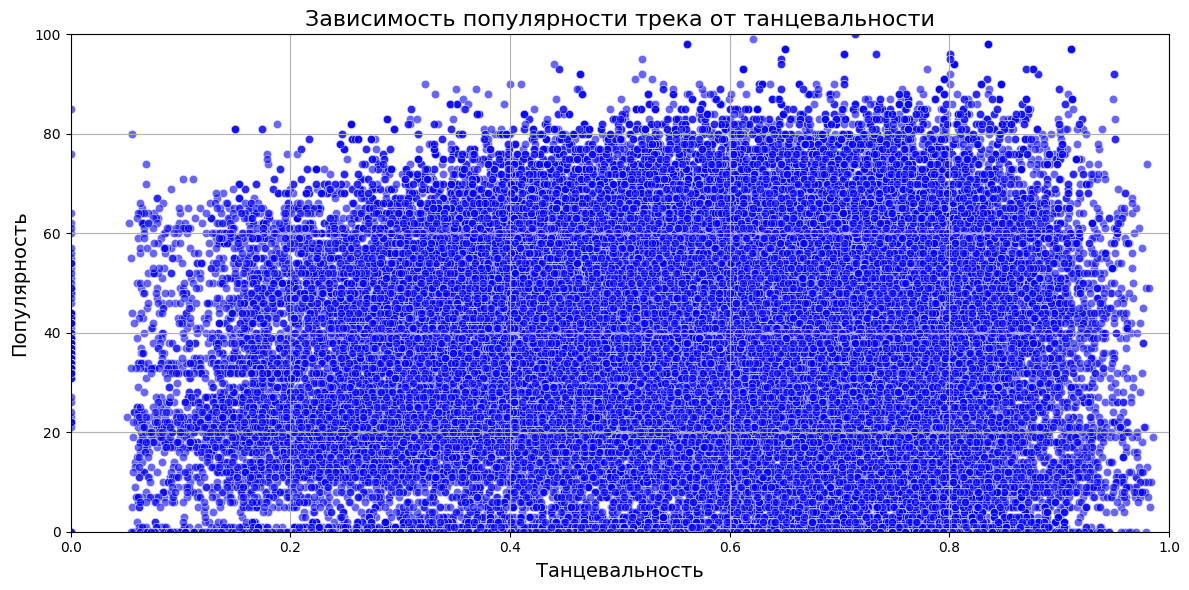

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='danceability', y='popularity', data=df, alpha=0.6, color='blue')
plt.title('Зависимость популярности трека от танцевальности', fontsize=16)
plt.xlabel('Танцевальность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
plt.show()

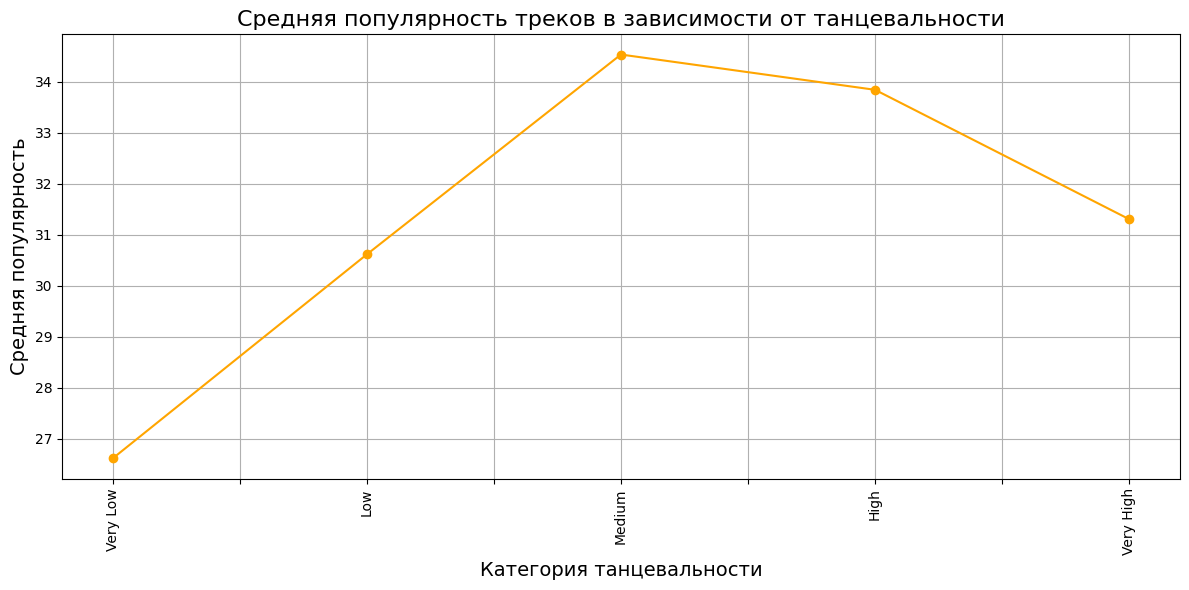

In [21]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['danceability_category'] = pd.cut(df['danceability'], bins=bins, labels=labels, right=False)

avg_popularity_by_danceability = df.groupby('danceability_category', observed=False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_danceability.plot(kind='line', marker='o', color='orange')
plt.title('Средняя популярность треков в зависимости от танцевальности', fontsize=16)
plt.xlabel('Категория танцевальности', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Вывод
Высокую популярность имеют песни со средней танцевальность, после идут уже более танцевальные и на третьем месте максимально танцевальные

### 4 Гипотеза
#### Энергичность

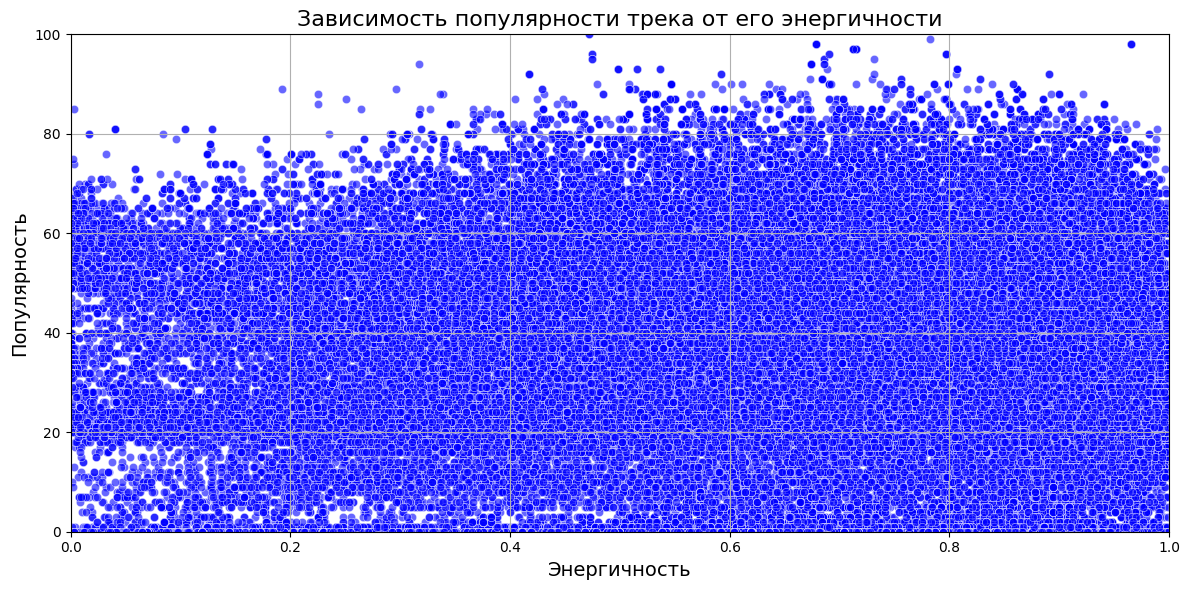

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='energy', y='popularity', data=df, alpha=0.6, color='blue')
plt.title('Зависимость популярности трека от его энергичности', fontsize=16)
plt.xlabel('Энергичность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
plt.show()

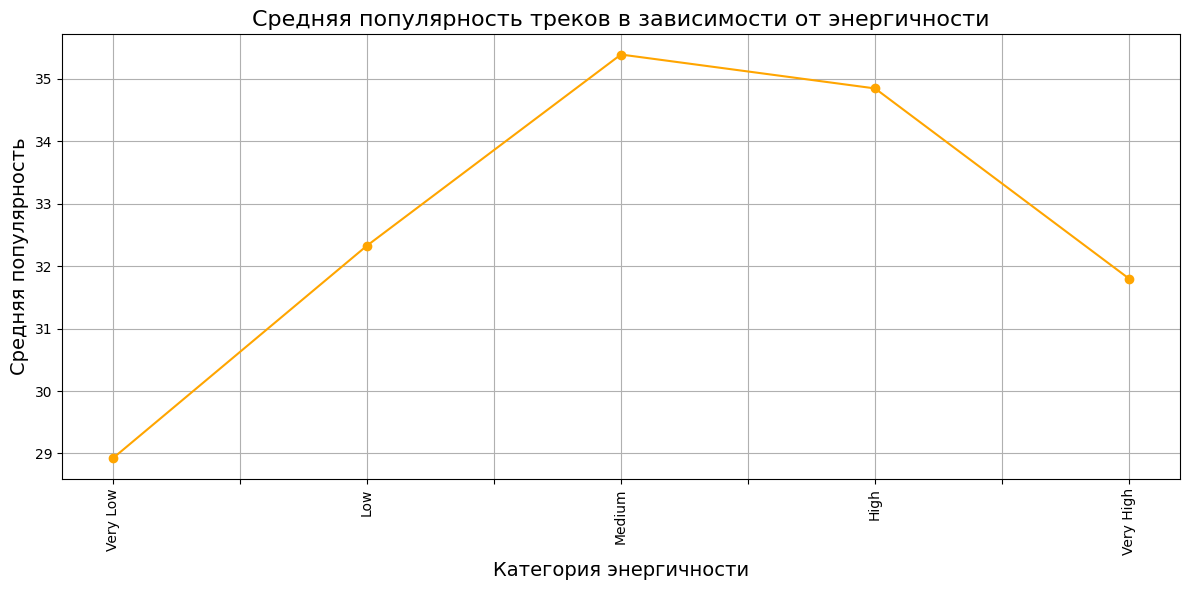

In [23]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['energy_category'] = pd.cut(df['energy'], bins=bins, labels=labels, right=False)

avg_popularity_by_energy = df.groupby('energy_category', observed=False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_energy.plot(kind='line', marker='o', color='orange')
plt.title('Средняя популярность треков в зависимости от энергичности', fontsize=16)
plt.xlabel('Категория энергичности', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Вывод
Высокую популярность имеют песни со средней энергичностью, после идут уже более энергичные и на третьем месте максимально энергичные

Мы можеи заметить, что графики танцевальности и энергичности почти идентичные, следовательно можно сделать вывод, что танцевальнсть, зачастую, зависит от энергичности, либо их значения похожи у каждой песни

###  5 Гипотеза
#### Громкость

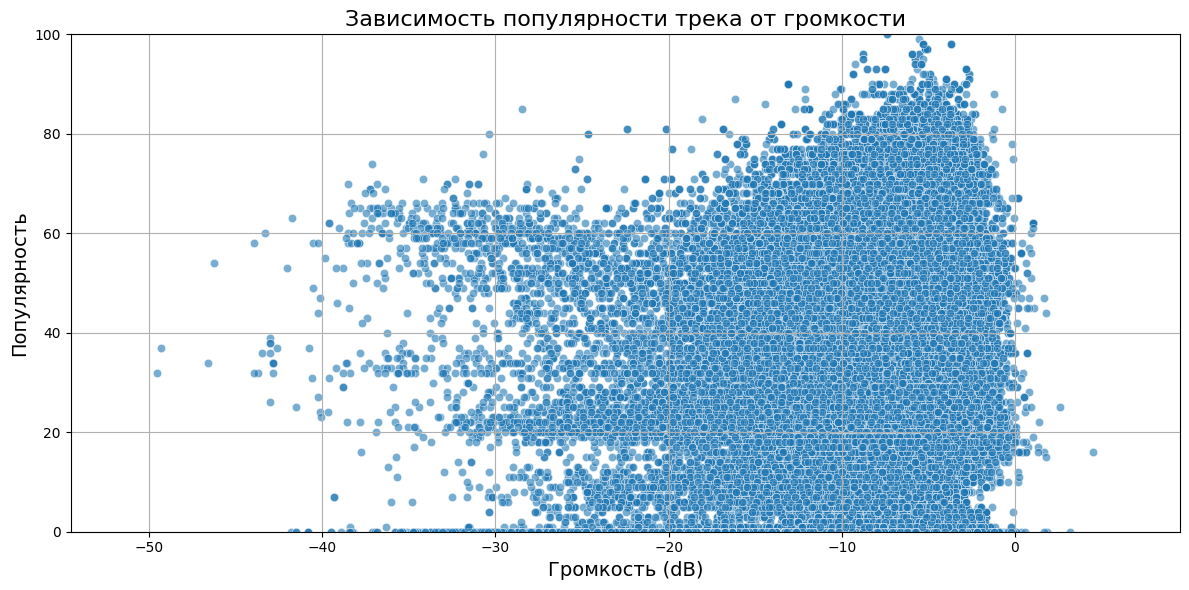

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='loudness', y='popularity', data=df, alpha=0.6)
plt.title('Зависимость популярности трека от громкости', fontsize=16)
plt.xlabel('Громкость (dB)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xlim(df['loudness'].min() - 5, df['loudness'].max() + 5)
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
plt.show()

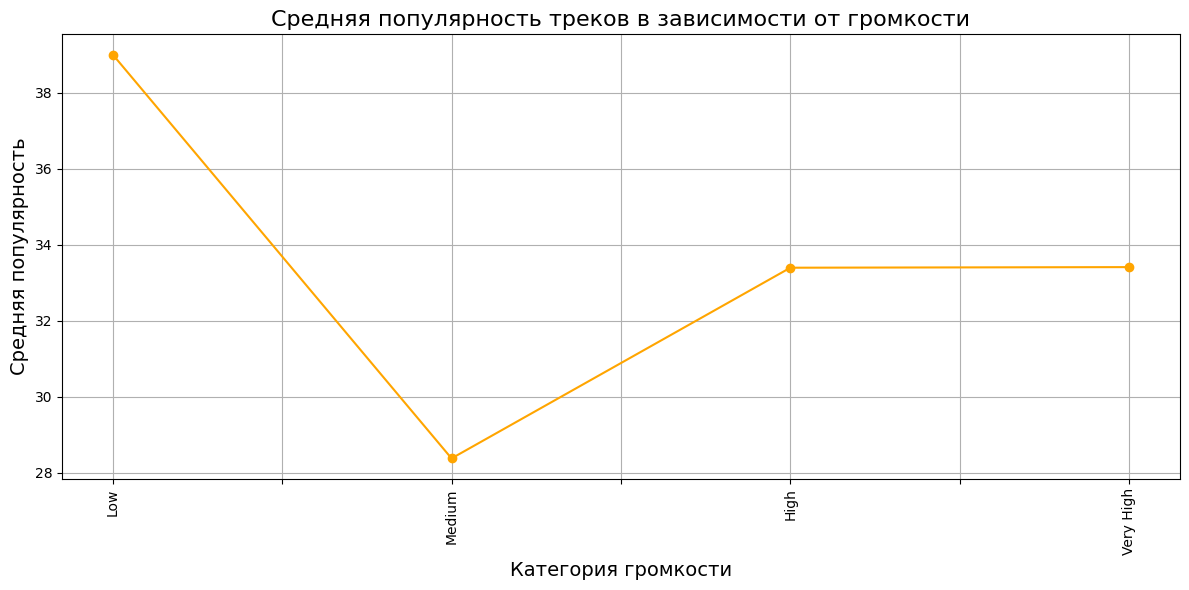

In [25]:
bins = [-50, -35, -20, -5, 10]
labels = ['Low', 'Medium', 'High', 'Very High']
df['loudness_category'] = pd.cut(df['loudness'], bins=bins, labels=labels)

avg_popularity_by_loudness = df.groupby('loudness_category', observed=False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_loudness.plot(kind='line', marker='o', color='orange')
plt.title('Средняя популярность треков в зависимости от громкости', fontsize=16)
plt.xlabel('Категория громкости', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Вывод
Можно сказать. что из всех представленных треков, особую популярность имеют громкие, но не самые, треки

###  6 Гипотеза
#### Разговорность

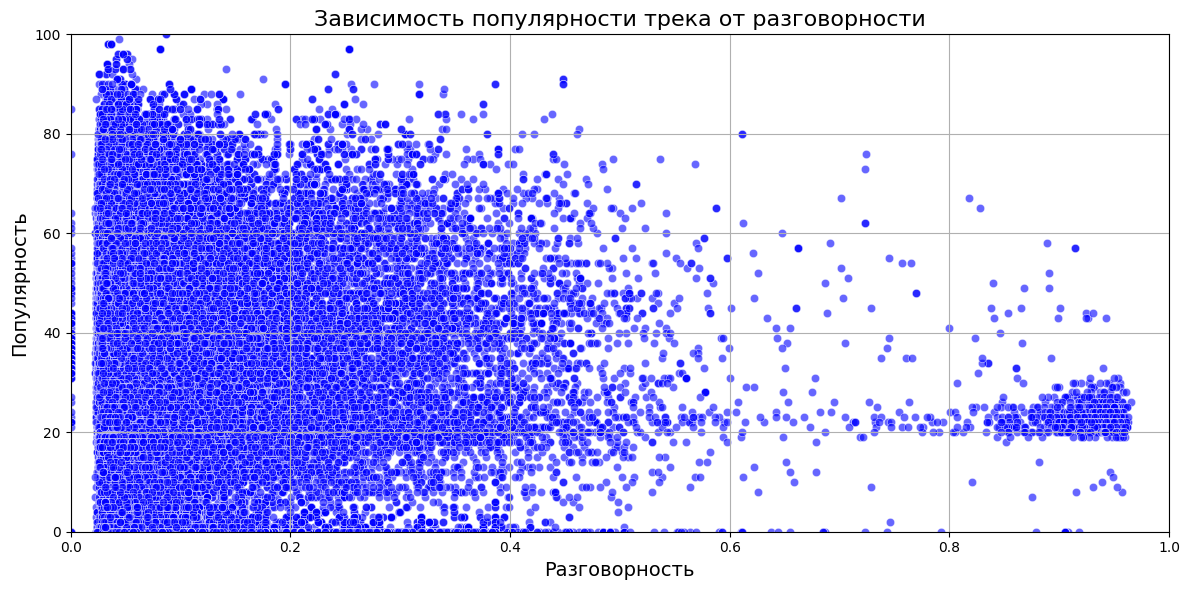

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='speechiness', y='popularity', data=df, alpha=0.6, color='blue')
plt.title('Зависимость популярности трека от разговорности', fontsize=16)
plt.xlabel('Разговорность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
plt.show()

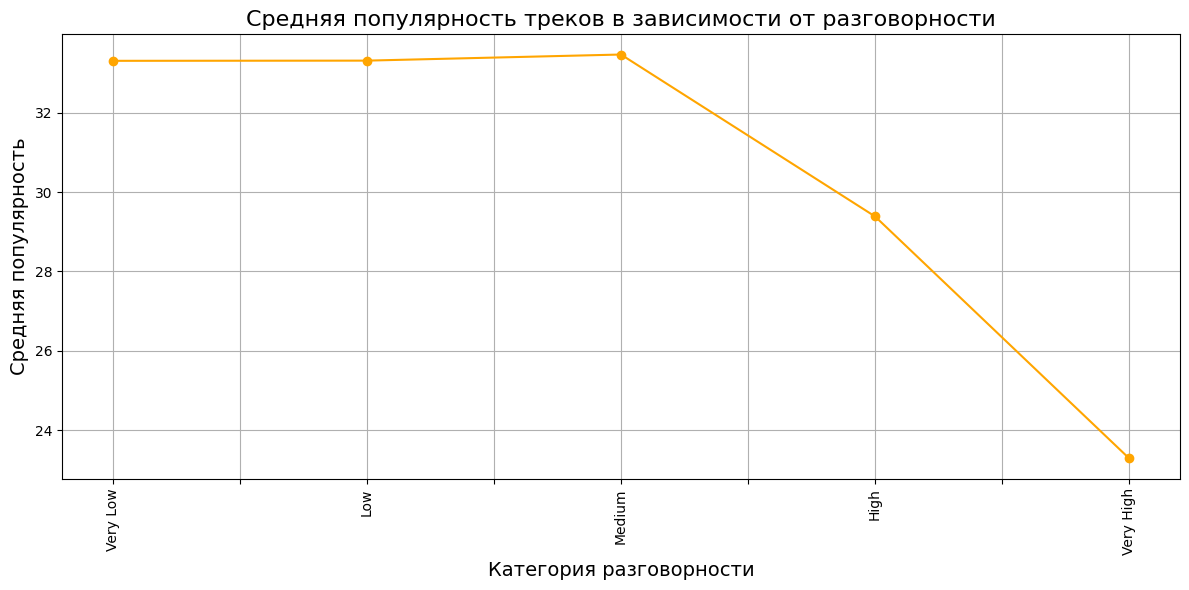

In [27]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['speechiness_category'] = pd.cut(df['speechiness'], bins=bins, labels=labels, right=False)

avg_popularity_by_speechiness = df.groupby('speechiness_category', observed=False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_speechiness.plot(kind='line', marker='o', color='orange')
plt.title('Средняя популярность треков в зависимости от разговорности', fontsize=16)
plt.xlabel('Категория разговорности', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Вывод
Самыми популярными являются более класические в общем понимание песни, без огромной разговорности, без "рэпа"

###  7 Гипотеза
#### Темп

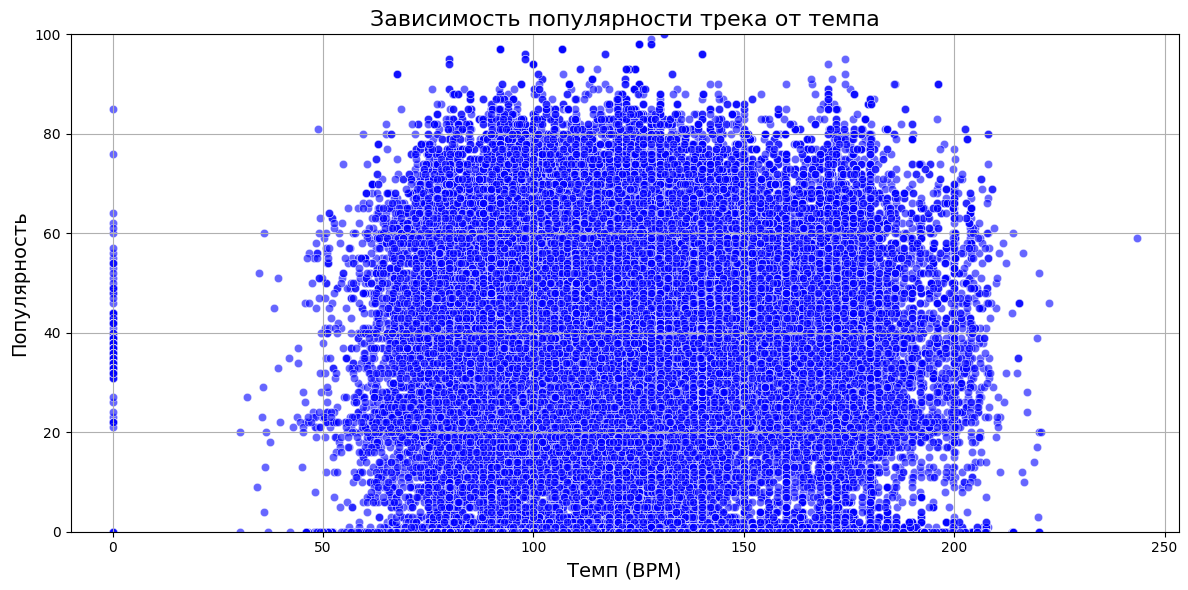

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tempo', y='popularity', data=df, alpha=0.6, color='blue')
plt.title('Зависимость популярности трека от темпа', fontsize=16)
plt.xlabel('Темп (BPM)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xlim(df['tempo'].min() - 10, df['tempo'].max() + 10)
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
plt.show()

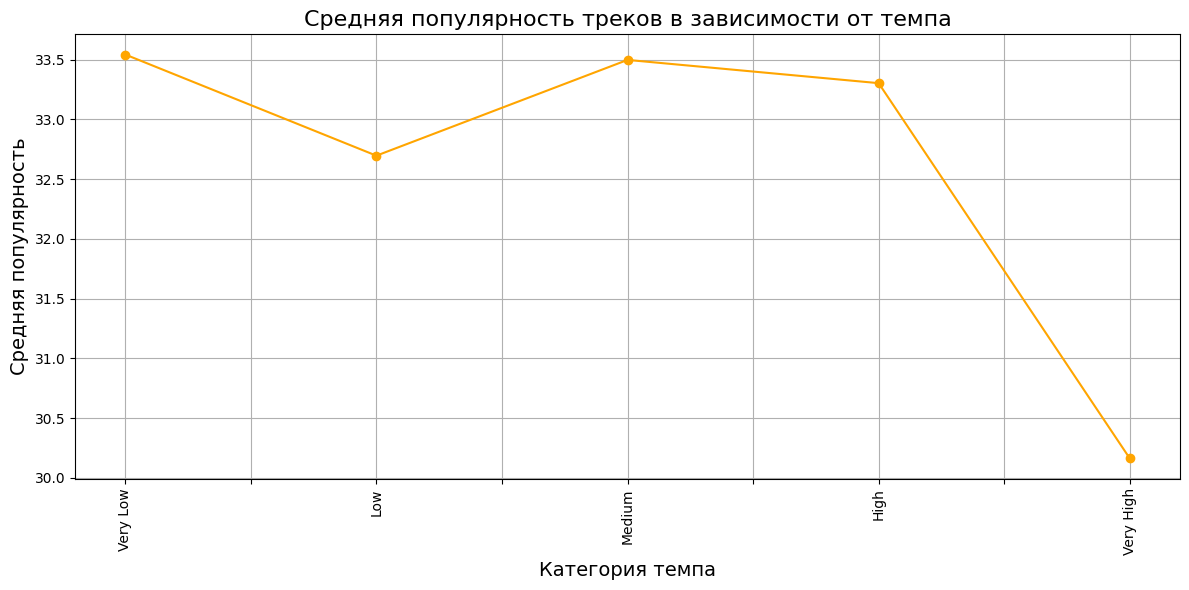

In [29]:
bins = [0, 50, 100, 150, 200, 250]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['tempo_category'] = pd.cut(df['tempo'], bins=bins, labels=labels, right=False)

avg_popularity_by_tempo = df.groupby('tempo_category', observed=False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_tempo.plot(kind='line', marker='o', color='orange')
plt.title('Средняя популярность треков в зависимости от темпа', fontsize=16)
plt.xlabel('Категория темпа', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Вывод
Самые популярные песни во средним темпом

###  8 Гипотеза
#### Жанр

<ipython-input-30-69abbe0e2a3e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')


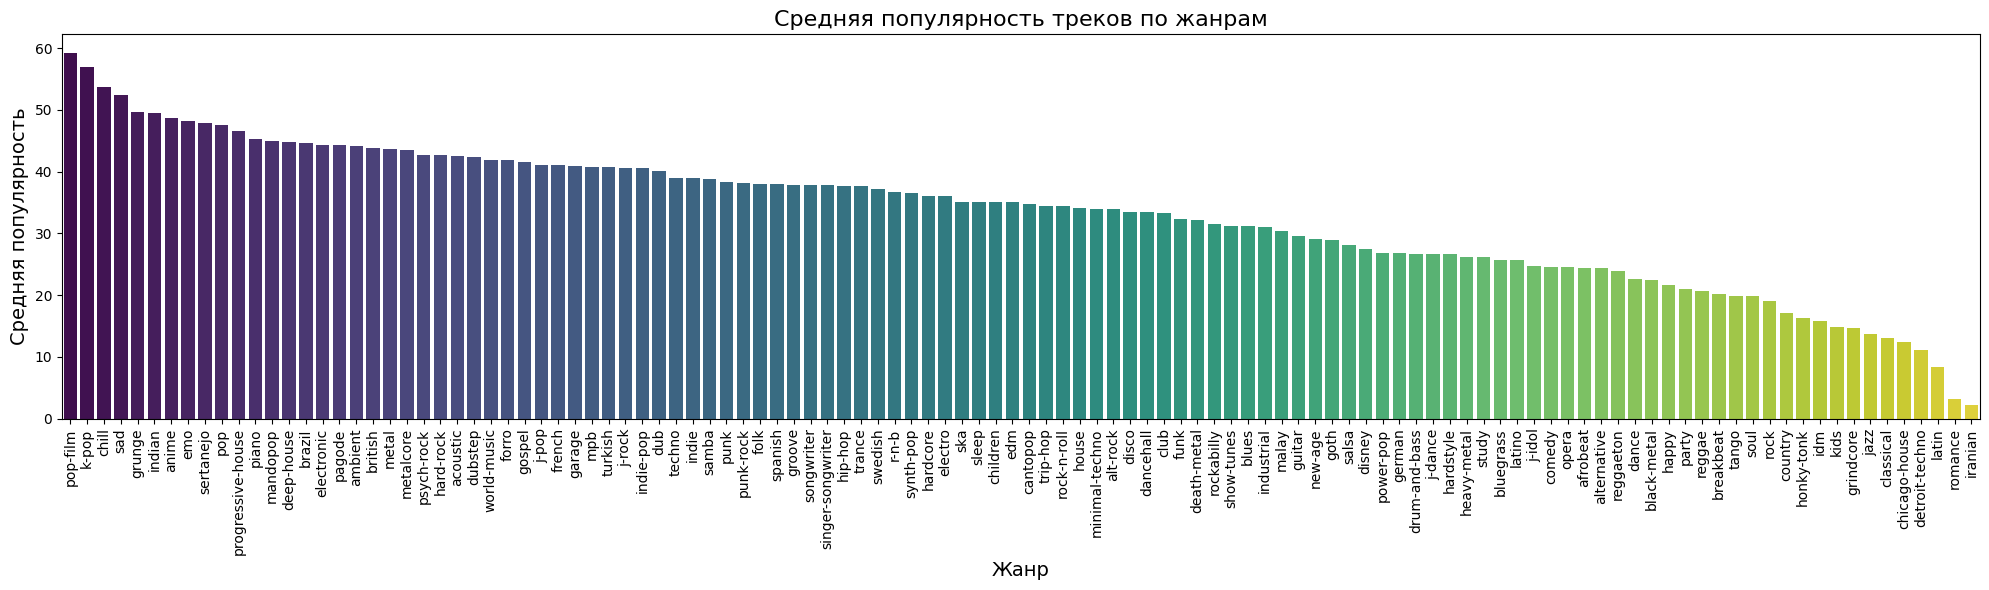

In [30]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.title('Средняя популярность треков по жанрам', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Вывод
Топ 5 самых популярных жанров: pop-film, k-pop, chill, sad, grunge

###  9 Гипотеза
#### Акустичность

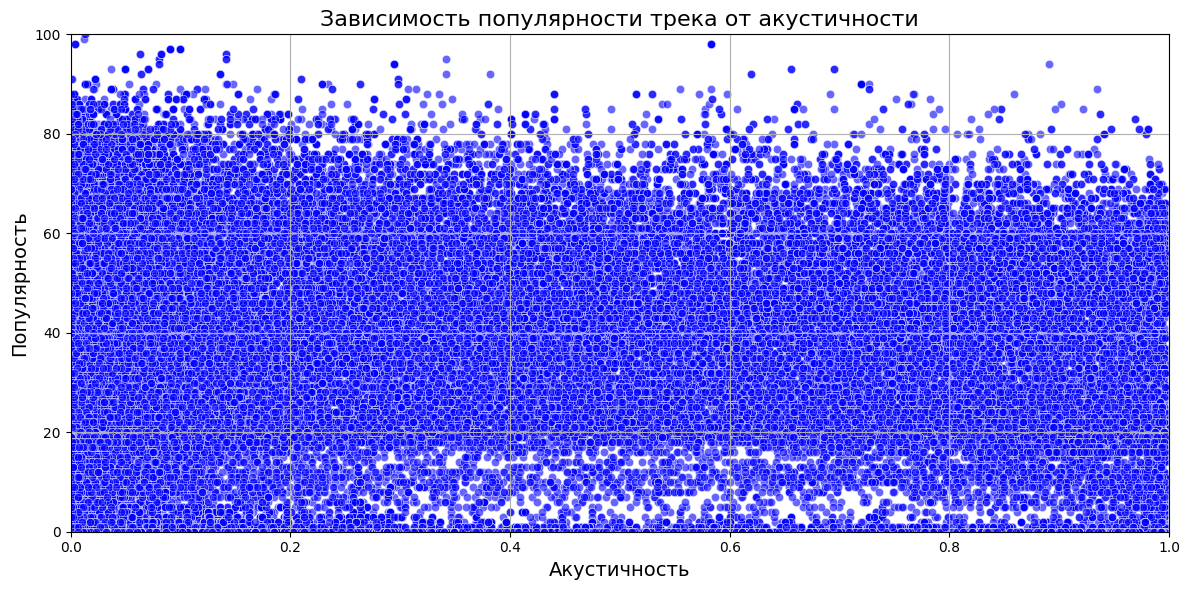

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='acousticness', y='popularity', data=df, alpha=0.6, color='blue')
plt.title('Зависимость популярности трека от акустичности', fontsize=16)
plt.xlabel('Акустичность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
plt.show()

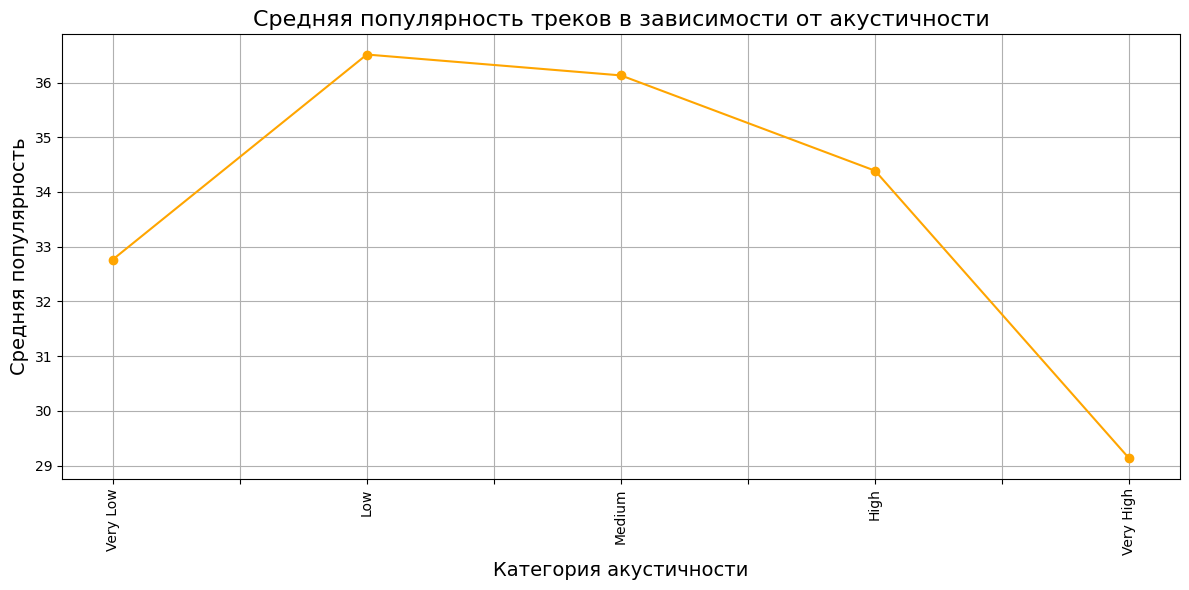

In [32]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['acousticness_category'] = pd.cut(df['acousticness'], bins=bins, labels=labels, right=False)

avg_popularity_by_acousticness = df.groupby('acousticness_category', observed=False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_acousticness.plot(kind='line', marker='o', color='orange')
plt.title('Средняя популярность треков в зависимости от акустичности', fontsize=16)
plt.xlabel('Категория акустичности', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Вывод
песни с малым или средним колическом акустики являются более популярными

###  10 Гипотеза
#### Позитивность

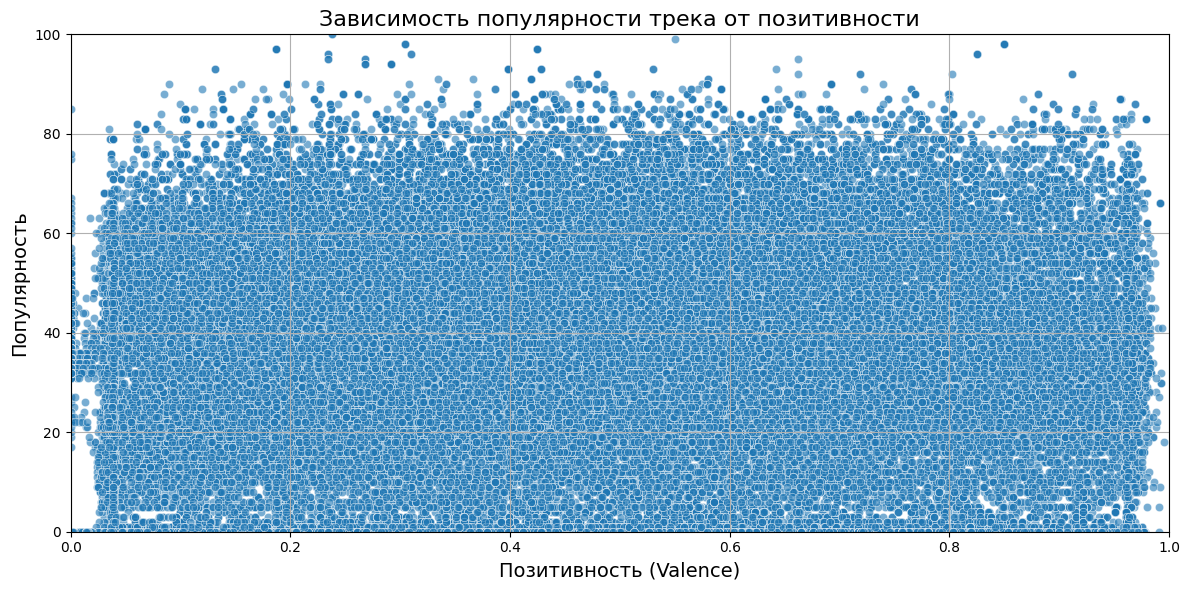

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='valence', y='popularity', data=df, alpha=0.6)
plt.title('Зависимость популярности трека от позитивности', fontsize=16)
plt.xlabel('Позитивность (Valence)', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
plt.show()

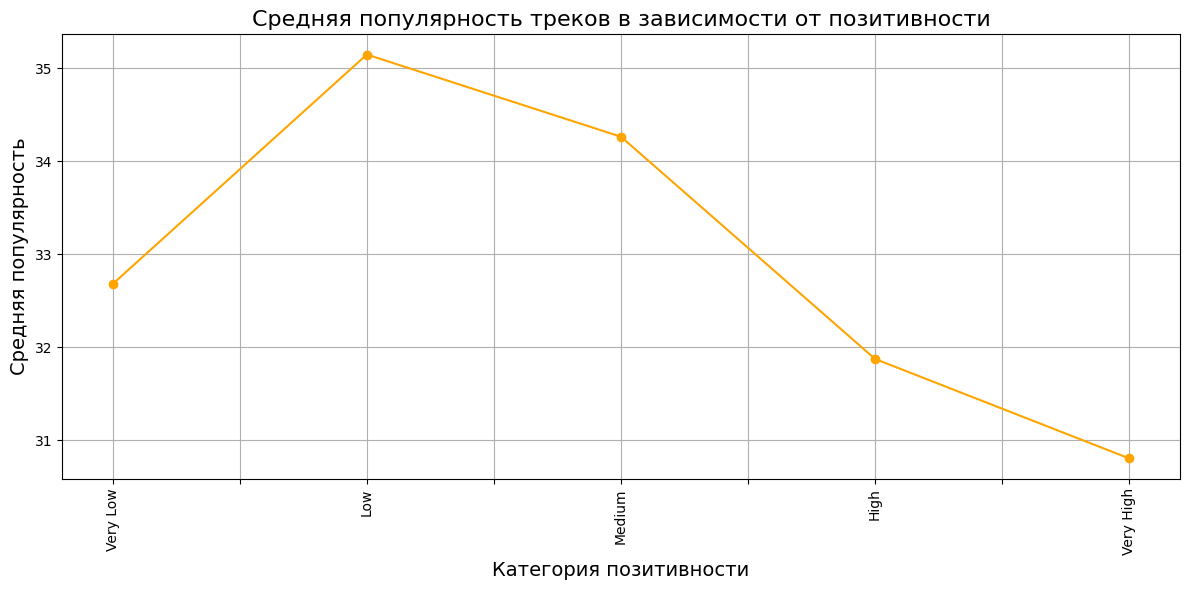

In [34]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['valence_category'] = pd.cut(df['valence'], bins=bins, labels=labels, right=False)

avg_popularity_by_valence = df.groupby('valence_category', observed=False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_valence.plot(kind='line', marker='o', color='orange')
plt.title('Средняя популярность треков в зависимости от позитивности', fontsize=16)
plt.xlabel('Категория позитивности', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Вывод
Менее позитивные треки являются более популярными чем наиболее позитивные

###  11 Гипотеза
#### Лад

<ipython-input-35-5975dadf30b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mode', y='popularity', data=df, palette='viridis')


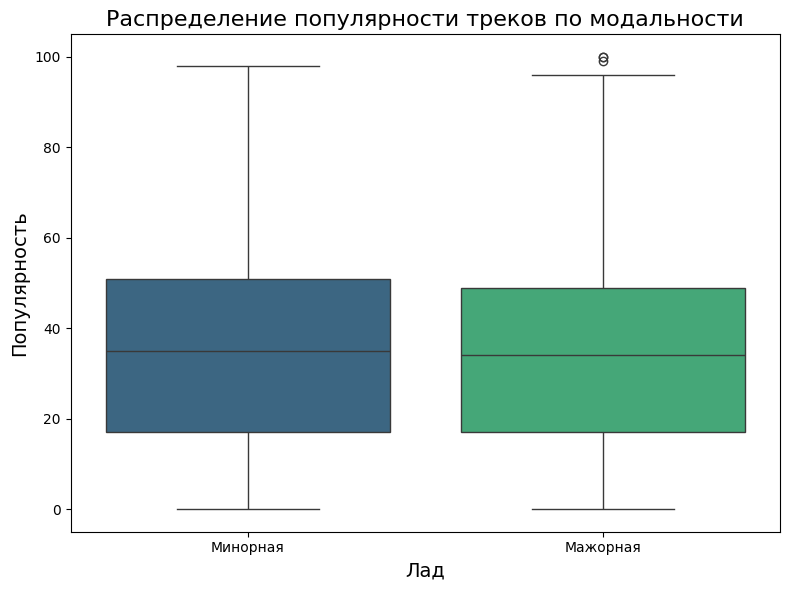

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='popularity', data=df, palette='viridis')
plt.title('Распределение популярности треков по модальности', fontsize=16)
plt.xlabel('Лад', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Минорная', 'Мажорная'])
plt.tight_layout()
plt.show()

<ipython-input-36-6a57d1244326>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mode', y='popularity', data=modal_popularity, palette='viridis')


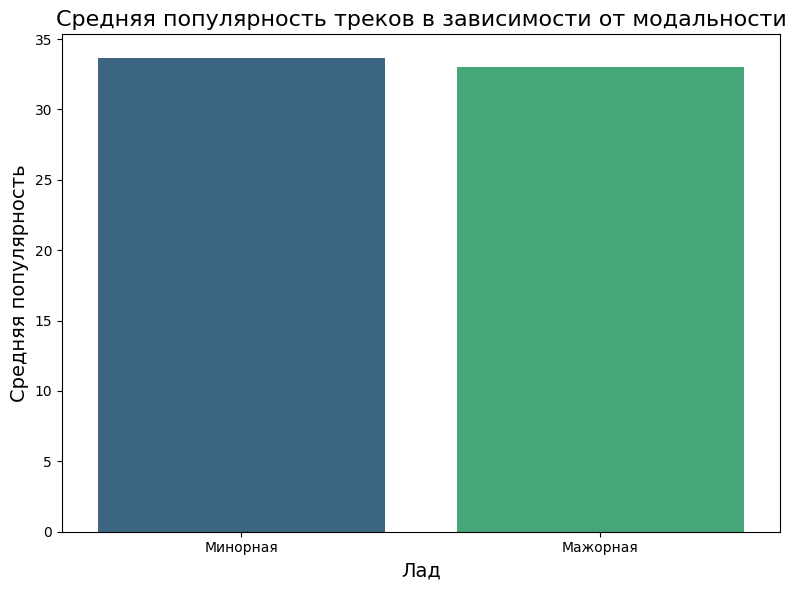

In [36]:
modal_popularity = df.groupby('mode')['popularity'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='mode', y='popularity', data=modal_popularity, palette='viridis')
plt.title('Средняя популярность треков в зависимости от модальности', fontsize=16)
plt.xlabel('Лад', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Минорная', 'Мажорная'])
plt.tight_layout()
plt.show()

#### Вывод
Из двух графиков мы можем сделать вывод, что песни в мажоре чуть менее популярны, чем песни в миноре. Разница минимальна, они на одном уровне

###  12 Гипотеза
#### Живой звук

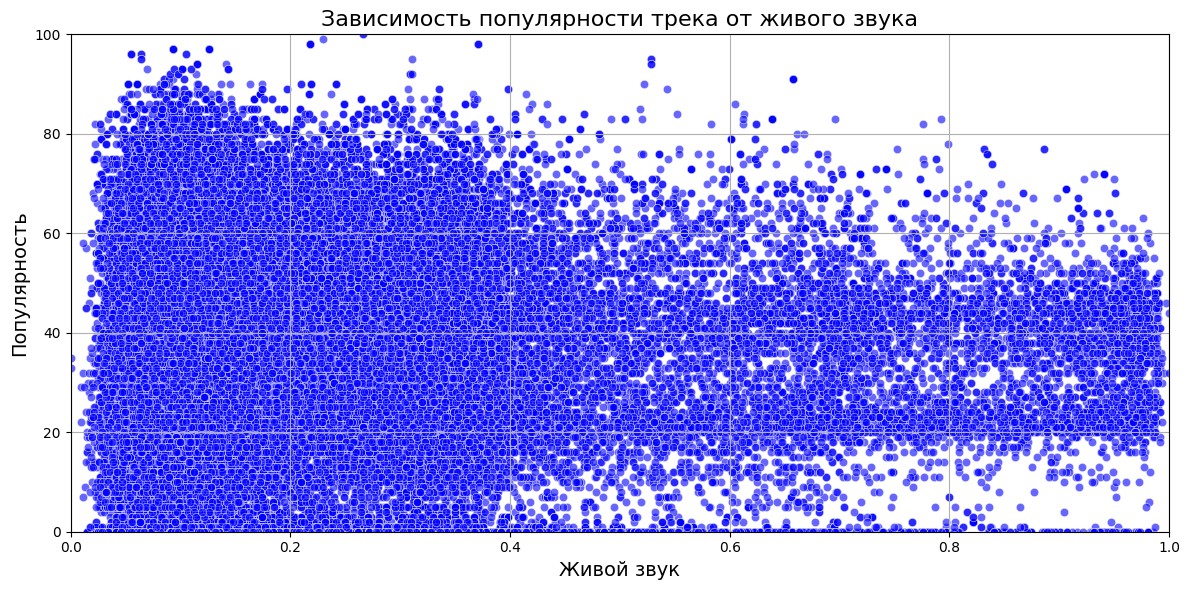

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='liveness', y='popularity', data=df, alpha=0.6, color='blue')
plt.title('Зависимость популярности трека от живого звука', fontsize=16)
plt.xlabel('Живой звук', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
plt.show()

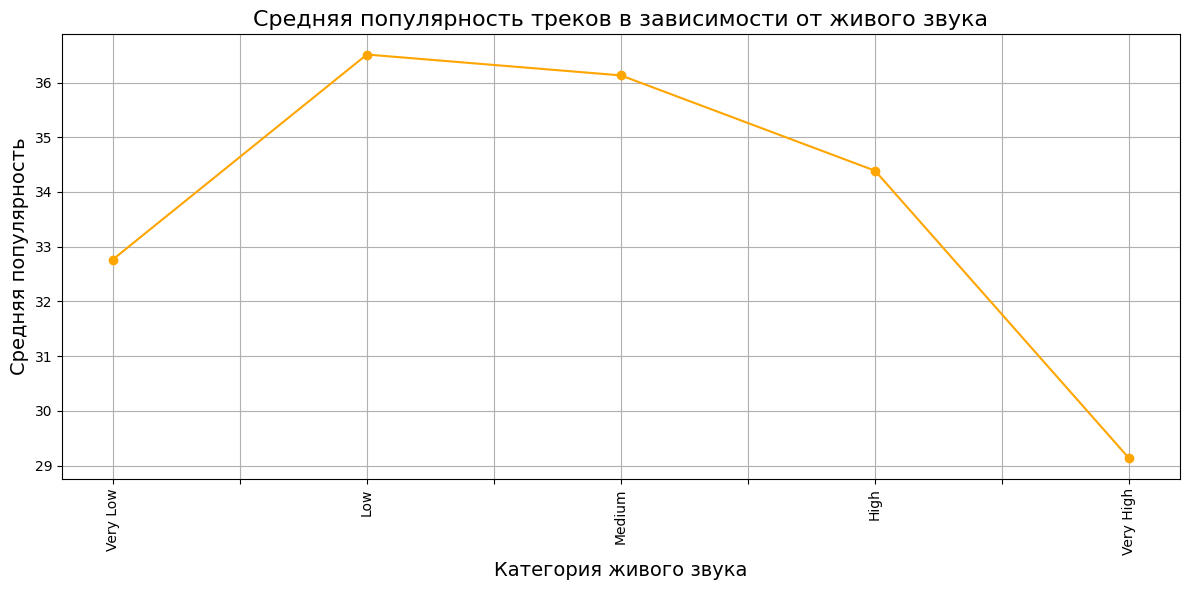

In [38]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['liveness_category'] = pd.cut(df['liveness'], bins=bins, labels=labels, right=False)

avg_popularity_by_acousticness = df.groupby('acousticness_category', observed=False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_acousticness.plot(kind='line', marker='o', color='orange')
plt.title('Средняя популярность треков в зависимости от живого звука', fontsize=16)
plt.xlabel('Категория живого звука', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Вывод
Более популярны песни с низким содержанием живого звука

###  13 Гипотеза
#### Инструментальность

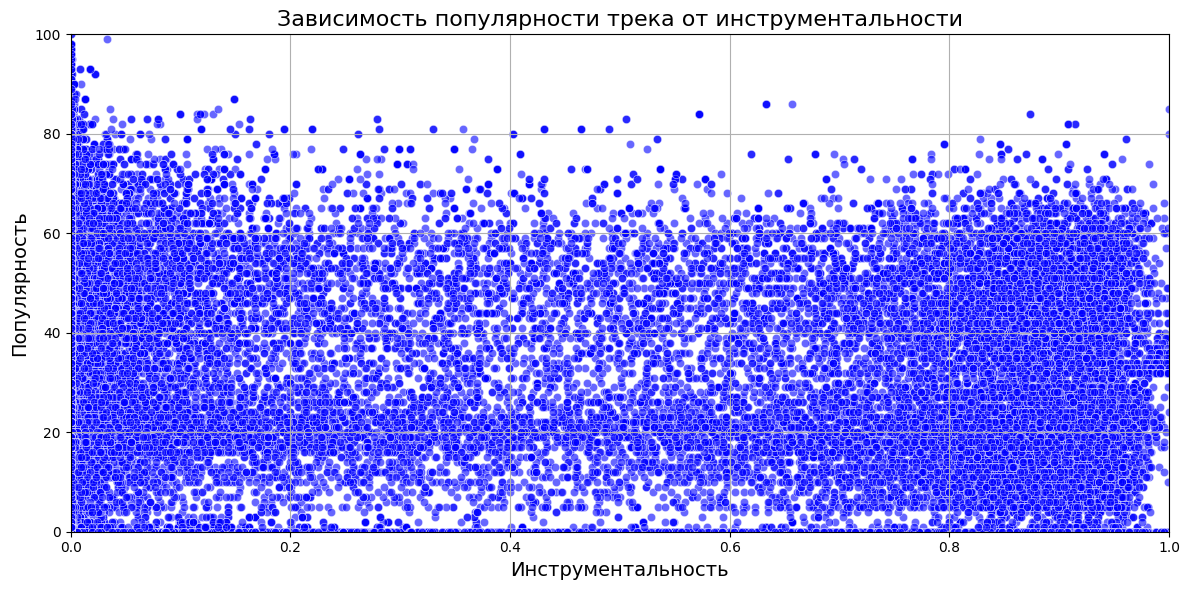

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='instrumentalness', y='popularity', data=df, alpha=0.6, color='blue')
plt.title('Зависимость популярности трека от инструментальности', fontsize=16)
plt.xlabel('Инструментальность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.xlim(0, 1)
plt.ylim(0, 100)
plt.grid()
plt.tight_layout()
plt.show()

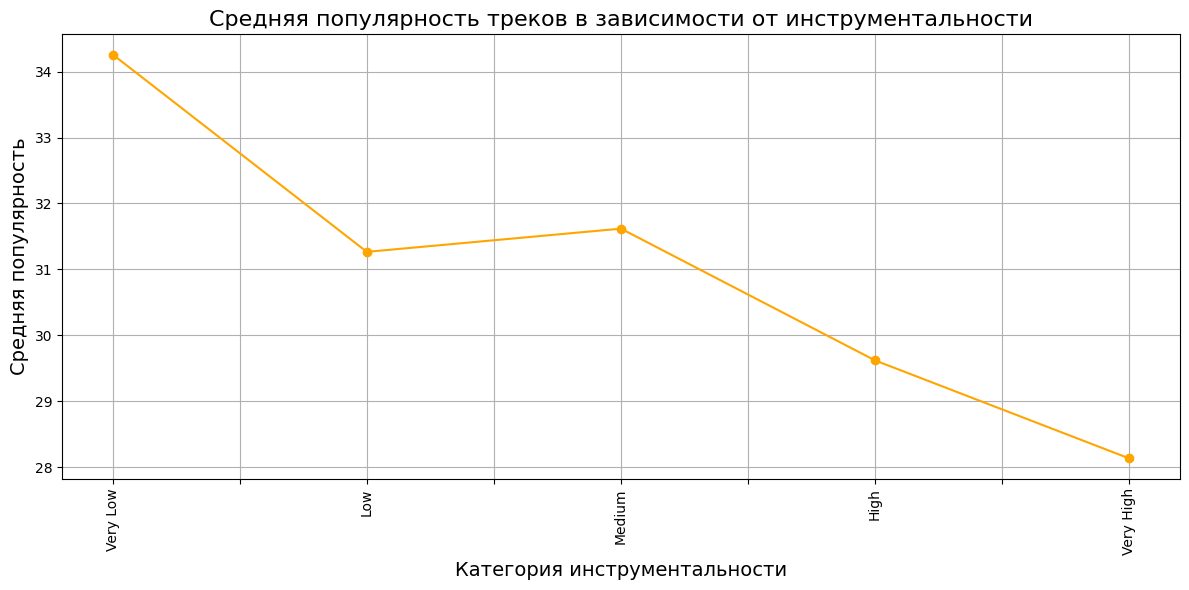

In [40]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['instrumentalness_category'] = pd.cut(df['instrumentalness'], bins=bins, labels=labels, right=False)

avg_popularity_by_instrumentalness = df.groupby('instrumentalness_category', observed=False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_instrumentalness.plot(kind='line', marker='o', color='orange')
plt.title('Средняя популярность треков в зависимости от инструментальности', fontsize=16)
plt.xlabel('Категория инструментальности', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Вывод
Наибольшую популярность имеют треки с низким либо среднем уровнем инструментальности

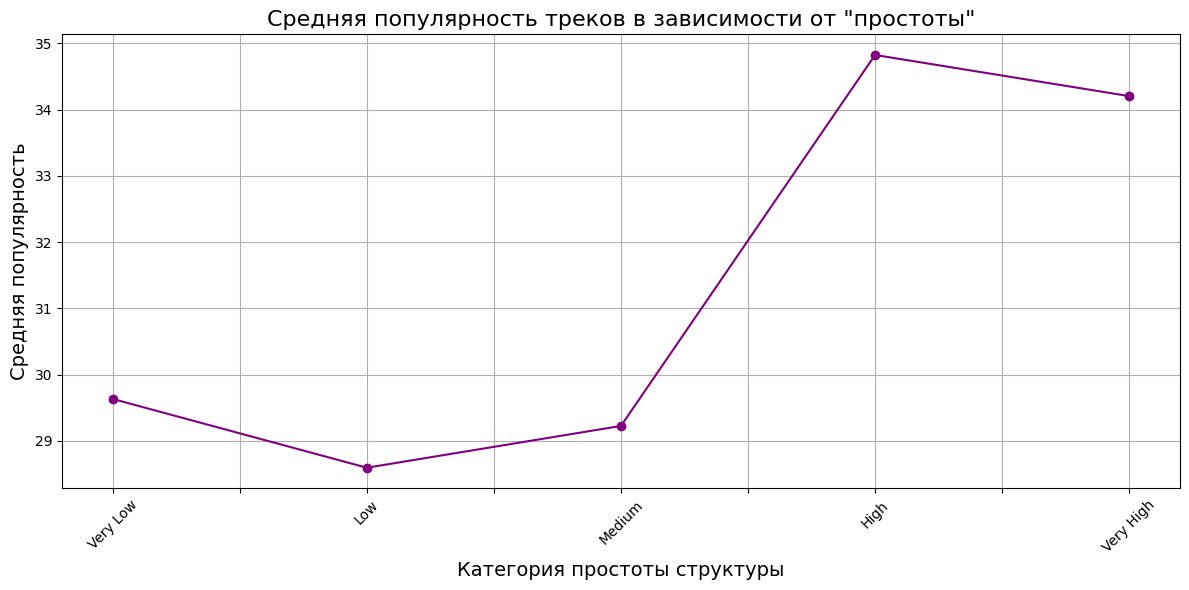

In [41]:
#Сложность трека. Треки с простой структурой чаще становятся популяпными
df['simplicity_score'] = (1 - df['instrumentalness']) + (1 - df['acousticness']) + df['danceability']
df['simplicity_category'] = pd.cut(df['simplicity_score'], bins=5, labels=labels, right=False)

avg_popularity_by_simplicity = df.groupby('simplicity_category', observed=False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_simplicity.plot(kind='line', marker='o', color='purple')
plt.title('Средняя популярность треков в зависимости от "простоты"', fontsize=16)
plt.xlabel('Категория простоты структуры', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Действительно треки, имеющие высокие очки простоты (hight и very hight) имееют более высокую популярность, чем треки с более сложной структурой.
Гипотеза подтвердилась

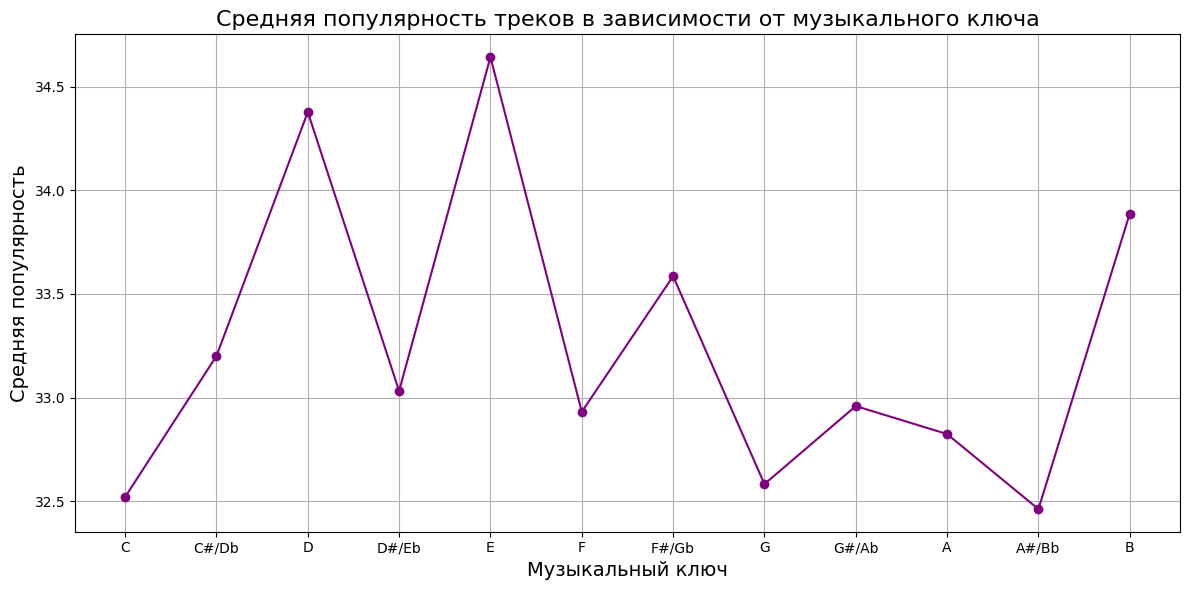

In [42]:
#Треки в определенных музыкальных ключах чаще становятся популярными.
avg_popularity_by_key =  df.groupby('key', observed = False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_key.plot(kind='line', marker='o', color='purple')
plt.title('Средняя популярность треков в зависимости от музыкального ключа', fontsize=16)
plt.xlabel('Музыкальный ключ', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.xticks(range(12), ['C','C#/Db','D','D#/Eb','E','F','F#/Gb','G','G#/Ab','A','A#/Bb','B'])
plt.grid()
plt.tight_layout()
plt.show()

Треки в музыкальных ключах D и E имеет большую популярность, чем остальные. Поэтому гипотеза о том, что треки в определенных музыкальных ключах чаще становятся популярными подтвержадается

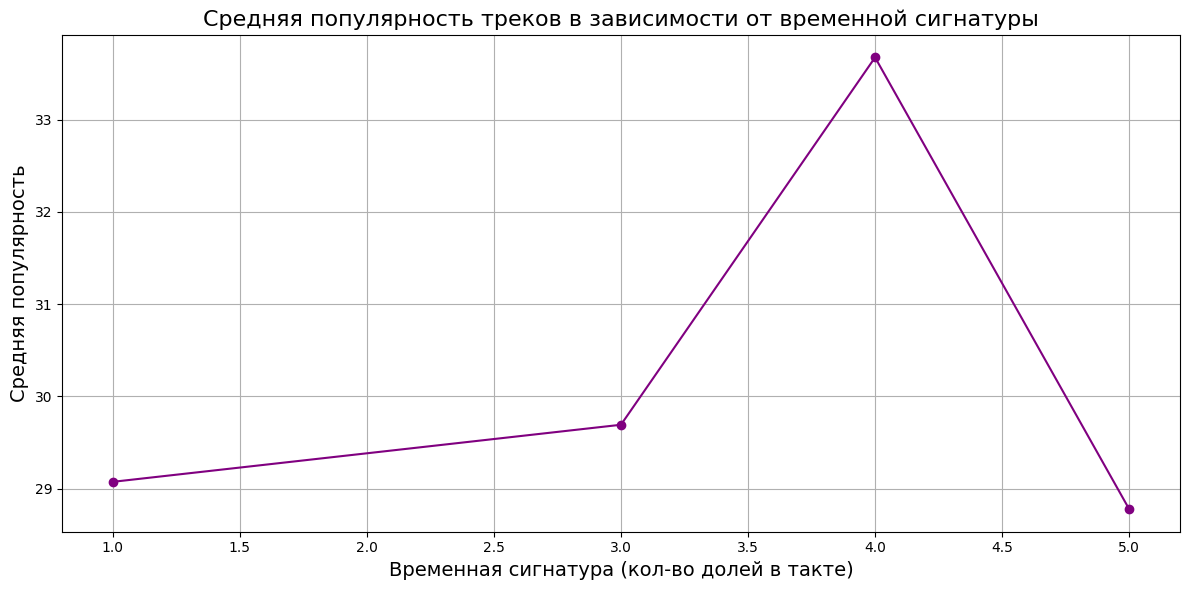

In [43]:
#Временная сигнатура. Треки с временой сигнатурой 4 чаще становятся популярными, так как более привычны слушателям.
df_filtred_time_signature = df[df['time_signature'] > 0]
avg_popularity_by_signature =  df_filtred_time_signature.groupby('time_signature', observed = False)['popularity'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_signature.plot(kind='line', marker='o', color='purple')
plt.title('Средняя популярность треков в зависимости от временной сигнатуры', fontsize=16)
plt.xlabel('Временная сигнатура (кол-во долей в такте)', fontsize=14)
plt.ylabel('Средняя популярность', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

Так как 0 это не музыкальный размер, а скорее пропущенное значение мы его не учитываем.
Временная сигнатура 4 имеет заметно более высокую среднюю популярноть, следователньо гипотеза подтверждается.

### Общий вывод

Можно сказать, что популярность в большинстве случаев не зависит от наличия 18+ контента, от лада, в котором написана музыка. Остальные критерии в той или иной степени влияют на популярность трека.

##Feature Importances

Проведем Feature Importances для того, что лучше узнать какие признаки наименьше всего влияют на таргет.

преобразуем категориальные метки в числовые значения.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Unnamed: 0                 113999 non-null  int64   
 1   popularity                 113999 non-null  int64   
 2   duration_ms                113999 non-null  float64 
 3   explicit                   113999 non-null  bool    
 4   danceability               113999 non-null  float64 
 5   energy                     113999 non-null  float64 
 6   key                        113999 non-null  int64   
 7   loudness                   113999 non-null  float64 
 8   mode                       113999 non-null  int64   
 9   speechiness                113999 non-null  float64 
 10  acousticness               113999 non-null  float64 
 11  instrumentalness           113999 non-null  float64 
 12  liveness                   113999 non-null  float64 
 13  valence            

In [45]:
df['explicit'] = df['explicit'].astype(int)

le = LabelEncoder()
df['track_genre'] = le.fit_transform(df['track_genre'])

category_columns = df.select_dtypes(include=['category']).columns
for col in category_columns:
    df[col] = df[col].cat.codes

In [46]:
X = df.drop(columns=['popularity'])
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

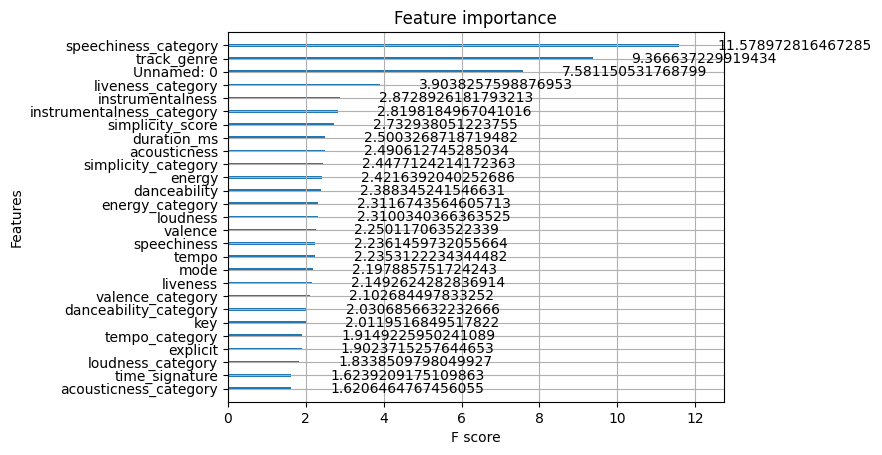

In [47]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Важность признаков (gain, weight, cover)
xgb.plot_importance(model, importance_type='gain')  # 'gain' — средний выигрыш при использовании признака
plt.show()

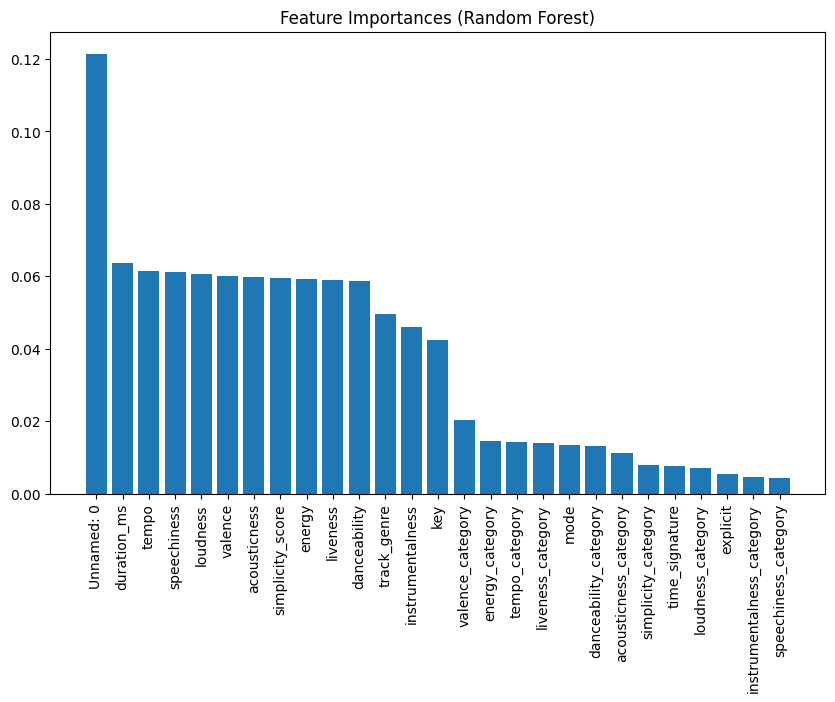

In [48]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Важность признаков
importances = model.feature_importances_
feature_names = X_train.columns

# Сортировка и визуализация
sorted_idx = importances.argsort()[::-1]  # Сортировка по убыванию
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.show()

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Коэффициенты (чем больше |coef|, тем важнее признак)
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

print(importance)

                      Feature    Importance
13                      tempo  4.686347e-04
0                  Unnamed: 0  6.239420e-05
6                    loudness  3.160028e-05
5                         key  2.227117e-05
14             time_signature  1.614132e-05
26        simplicity_category  1.378091e-05
1                 duration_ms  1.282586e-05
16      danceability_category  1.034226e-05
17            energy_category  1.029525e-05
18          loudness_category  9.585824e-06
22           valence_category  9.571590e-06
25           simplicity_score  9.377173e-06
20             tempo_category  7.218470e-06
21      acousticness_category  5.061017e-06
7                        mode  2.884608e-06
3                danceability  2.471944e-06
4                      energy  2.469158e-06
12                    valence  2.345718e-06
9                acousticness  1.402106e-06
15                track_genre  9.693877e-07
11                   liveness  4.653621e-07
2                    explicit  4

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


По графикам видно, что меньше всего на популярность влияют explicit, speechiness_category, instrumentalness_category, loudness_category, time_signature, simplicity_category.

In [50]:
X_train = X_train.drop(columns=['explicit', 'speechiness_category', 'instrumentalness_category', 'loudness_category', 'time_signature', 'simplicity_category'])
X_test = X_test.drop(columns=['explicit', 'speechiness_category', 'instrumentalness_category', 'loudness_category', 'time_signature', 'simplicity_category'])

# Модели

Проведем масштабирование данных, для лучшего обучения моделей.

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Линейная модель


In [52]:
# 2. Создание и обучение модели
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 3. Предсказания и оценка на тестовом наборе
y_pred = model.predict(X_test_scaled)

print('=== Метрики на тестовом наборе ===')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
print(f'R2: {r2_score(y_test, y_pred):.4f}')

# 4. Улучшенная кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = {
    'mae': [],
    'mse': [],
    'rmse': [],
    'r2': [],
}

for train_idx, val_idx in kf.split(X_train_scaled):
    X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    fold_model = LinearRegression()
    fold_model.fit(X_fold_train, y_fold_train)
    y_fold_pred = fold_model.predict(X_fold_val)

    cv_metrics['mae'].append(mean_absolute_error(y_fold_val, y_fold_pred))
    cv_metrics['mse'].append(mean_squared_error(y_fold_val, y_fold_pred))
    cv_metrics['rmse'].append(np.sqrt(cv_metrics['mse'][-1]))
    cv_metrics['r2'].append(r2_score(y_fold_val, y_fold_pred))

# 5. Вывод результатов кросс-валидации
print('\n=== Результаты кросс-валидации ===')
for i in range(5):
    print(f'Фолд {i+1}: '
          f'MAE: {cv_metrics["mae"][i]:.4f}, '
          f'MSE: {cv_metrics["mse"][i]:.4f}, '
          f'RMSE: {cv_metrics["rmse"][i]:.4f}, '
          f'R2: {cv_metrics["r2"][i]:.4f} ')

print('\n=== Средние метрики кросс-валидации ===')
print(f'MAE: {np.mean(cv_metrics["mae"]):.4f} (±{np.std(cv_metrics["mae"]):.4f})')
print(f'MSE: {np.mean(cv_metrics["mse"]):.4f} (±{np.std(cv_metrics["mse"]):.4f})')
print(f'RMSE: {np.mean(cv_metrics["rmse"]):.4f} (±{np.std(cv_metrics["rmse"]):.4f})')
print(f'R2: {np.mean(cv_metrics["r2"]):.4f} (±{np.std(cv_metrics["r2"]):.4f})')


=== Метрики на тестовом наборе ===
MAE: 18.3085
MSE: 483.3042
RMSE: 21.9842
R2: 0.0255

=== Результаты кросс-валидации ===
Фолд 1: MAE: 18.2714, MSE: 482.1693, RMSE: 21.9584, R2: 0.0267 
Фолд 2: MAE: 18.3448, MSE: 487.2524, RMSE: 22.0738, R2: 0.0263 
Фолд 3: MAE: 18.4281, MSE: 488.9767, RMSE: 22.1128, R2: 0.0261 
Фолд 4: MAE: 18.4220, MSE: 488.6106, RMSE: 22.1045, R2: 0.0252 
Фолд 5: MAE: 18.1782, MSE: 478.5891, RMSE: 21.8767, R2: 0.0265 

=== Средние метрики кросс-валидации ===
MAE: 18.3289 (±0.0946)
MSE: 485.1196 (±4.0734)
RMSE: 22.0252 (±0.0926)
R2: 0.0262 (±0.0005)


## Деревья решений

In [53]:
model = DecisionTreeRegressor(random_state=42)

# Упрощенная сетка параметров
param_grid = {
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


# Ускоренный GridSearchCV
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Быстрый поиск параметров
grid_search.fit(X_train_scaled, y_train)

# Лучшая модель
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f'Лучшие параметры: {best_params}')
print(f'Лучший MSE: {best_score:.4f}\n')

best_tree = DecisionTreeRegressor(**best_params, random_state=42)
best_tree.fit(X_train_scaled, y_train)


# Быстрая оценка на тесте
pred = best_tree.predict(X_test)
print('=== Метрики на тестовом наборе ===')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
print(f'R2: {r2_score(y_test, y_pred):.4f}')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = {
    'mae': [],
    'mse': [],
    'rmse': [],
    'r2': []
}

for train_idx, val_idx in kf.split(X_train_scaled):
    X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    fold_model = DecisionTreeRegressor()
    fold_model.fit(X_fold_train, y_fold_train)
    y_fold_pred = fold_model.predict(X_fold_val)

    cv_metrics['mae'].append(mean_absolute_error(y_fold_val, y_fold_pred))
    cv_metrics['mse'].append(mean_squared_error(y_fold_val, y_fold_pred))
    cv_metrics['rmse'].append(np.sqrt(cv_metrics['mse'][-1]))
    cv_metrics['r2'].append(r2_score(y_fold_val, y_fold_pred))

# 5. Вывод результатов кросс-валидации
print('\n=== Результаты кросс-валидации ===')
for i in range(5):
    print(f'Фолд {i+1}: '
          f'MAE: {cv_metrics["mae"][i]:.4f}, '
          f'MSE: {cv_metrics["mse"][i]:.4f}, '
          f'RMSE: {cv_metrics["rmse"][i]:.4f}, '
          f'R2: {cv_metrics["r2"][i]:.4f}')

print('\n=== Средние метрики кросс-валидации ===')
print(f'MAE: {np.mean(cv_metrics["mae"]):.4f} (±{np.std(cv_metrics["mae"]):.4f})')
print(f'MSE: {np.mean(cv_metrics["mse"]):.4f} (±{np.std(cv_metrics["mse"]):.4f})')
print(f'RMSE: {np.mean(cv_metrics["rmse"]):.4f} (±{np.std(cv_metrics["rmse"]):.4f})')
print(f'R2: {np.mean(cv_metrics["r2"]):.4f} (±{np.std(cv_metrics["r2"]):.4f})')

Лучшие параметры: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Лучший MSE: 373.7665



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


=== Метрики на тестовом наборе ===
MAE: 18.3085
MSE: 483.3042
RMSE: 21.9842
R2: 0.0255

=== Результаты кросс-валидации ===
Фолд 1: MAE: 12.7282, MSE: 479.9707, RMSE: 21.9082, R2: 0.0311
Фолд 2: MAE: 12.4646, MSE: 467.3091, RMSE: 21.6173, R2: 0.0662
Фолд 3: MAE: 12.8327, MSE: 490.8079, RMSE: 22.1542, R2: 0.0224
Фолд 4: MAE: 12.7042, MSE: 467.8007, RMSE: 21.6287, R2: 0.0667
Фолд 5: MAE: 12.7353, MSE: 478.5975, RMSE: 21.8769, R2: 0.0265

=== Средние метрики кросс-валидации ===
MAE: 12.6930 (±0.1223)
MSE: 476.8972 (±8.7238)
RMSE: 21.8371 (±0.1995)
R2: 0.0426 (±0.0197)


## Градиентный бустинг

In [54]:
# 1. Определение модели и параметров
grad = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', None]
}

# 2. Поиск параметров
grid_search = GridSearchCV(
    grad,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# 3. Лучшая модель
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f'Лучшие параметры: {best_params}')
print(f'Лучший MSE: {best_score:.4f}\n')

best_grad = GradientBoostingRegressor(**best_params, random_state=42)
best_grad.fit(X_train_scaled, y_train)

# 4. Оценка на тесте
pred = best_grad.predict(X_test)
print('=== Метрики на тестовом наборе ===')
print(f'MAE: {mean_absolute_error(y_test, pred):.4f}')
print(f'MSE: {mean_squared_error(y_test, pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.4f}')
print(f'R2: {r2_score(y_test, pred):.4f}')

# 5. Кросс-валидация с исправлением индексов
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = {
    'mae': [],
    'mse': [],
    'rmse': [],
    'r2': []
}


for train_idx, val_idx in kf.split(X_train_scaled):
    X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    fold_model = GradientBoostingRegressor(**best_params, random_state=42)
    fold_model.fit(X_fold_train, y_fold_train)
    y_fold_pred = fold_model.predict(X_fold_val)

    cv_metrics['mae'].append(mean_absolute_error(y_fold_val, y_fold_pred))
    cv_metrics['mse'].append(mean_squared_error(y_fold_val, y_fold_pred))
    cv_metrics['rmse'].append(np.sqrt(cv_metrics['mse'][-1]))
    cv_metrics['r2'].append(r2_score(y_fold_val, y_fold_pred))

# 6. Вывод результатов
print('\n=== Результаты кросс-валидации ===')
for i in range(5):
    print(f'Фолд {i+1}: '
          f'MAE: {cv_metrics["mae"][i]:.4f}, '
          f'MSE: {cv_metrics["mse"][i]:.4f}, '
          f'RMSE: {cv_metrics["rmse"][i]:.4f}, '
          f'R2: {cv_metrics["r2"][i]:.4f}')

print('\n=== Средние метрики кросс-валидации ===')
print(f'MAE: {np.mean(cv_metrics["mae"]):.4f} (±{np.std(cv_metrics["mae"]):.4f})')
print(f'MSE: {np.mean(cv_metrics["mse"]):.4f} (±{np.std(cv_metrics["mse"]):.4f})')
print(f'RMSE: {np.mean(cv_metrics["rmse"]):.4f} (±{np.std(cv_metrics["rmse"]):.4f})')
print(f'R2: {np.mean(cv_metrics["r2"]):.4f} (±{np.std(cv_metrics["r2"]):.4f})')

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}
Лучший MSE: 364.3908



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


=== Метрики на тестовом наборе ===
MAE: 19.0977
MSE: 506.4789
RMSE: 22.5051
R2: -0.0212

=== Результаты кросс-валидации ===
Фолд 1: MAE: 14.9080, MSE: 362.6582, RMSE: 19.0436, R2: 0.2679
Фолд 2: MAE: 14.9591, MSE: 367.4467, RMSE: 19.1689, R2: 0.2657
Фолд 3: MAE: 15.0662, MSE: 370.0453, RMSE: 19.2366, R2: 0.2630
Фолд 4: MAE: 15.0066, MSE: 367.3501, RMSE: 19.1664, R2: 0.2671
Фолд 5: MAE: 14.8170, MSE: 357.9624, RMSE: 18.9199, R2: 0.2719

=== Средние метрики кросс-валидации ===
MAE: 14.9514 (±0.0851)
MSE: 365.0925 (±4.2880)
RMSE: 19.1071 (±0.1124)
R2: 0.2671 (±0.0029)


## Нейронные сети

In [55]:
# 2. Определение модели и параметров
mlp = MLPRegressor(random_state=44, early_stopping=True)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'alpha': [0.001],
    'learning_rate_init': [0.01],
}

# 3. Поиск параметров
grid_search = GridSearchCV(
    mlp,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)

# 4. Лучшая модель
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f'\nЛучшие параметры: {best_params}')
print(f'Лучший MSE: {best_score:.4f}')

best_mlp = MLPRegressor(**best_params, random_state=44)
best_mlp.fit(X_train_scaled, y_train)

# 5. Оценка на тесте (исправлены названия переменных)
pred = best_mlp.predict(X_test_scaled)
print('\n=== Метрики на тестовом наборе ===')
print(f'MAE: {mean_absolute_error(y_test, pred):.4f}')
print(f'MSE: {mean_squared_error(y_test, pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.4f}')
print(f'R2: {r2_score(y_test, pred):.4f}')

# 6. Кросс-валидация (исправлено: используем MLPRegressor)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = {
    'mae': [],
    'mse': [],
    'rmse': [],
    'r2': []
}

for train_idx, val_idx in kf.split(X_train_scaled):
    X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    fold_mlp = MLPRegressor(**best_params, random_state=44)
    fold_mlp.fit(X_fold_train, y_fold_train)
    y_fold_pred = fold_mlp.predict(X_fold_val)

    cv_metrics['mae'].append(mean_absolute_error(y_fold_val, y_fold_pred))
    cv_metrics['mse'].append(mean_squared_error(y_fold_val, y_fold_pred))
    cv_metrics['rmse'].append(np.sqrt(cv_metrics['mse'][-1]))
    cv_metrics['r2'].append(r2_score(y_fold_val, y_fold_pred))

# 7. Вывод результатов
print('\n=== Результаты кросс-валидации ===')
for i in range(5):  # Исправлено на 3 фолда
    print(f'Фолд {i+1}: '
          f'MAE: {cv_metrics["mae"][i]:.4f}, '
          f'MSE: {cv_metrics["mse"][i]:.4f}, '
          f'RMSE: {cv_metrics["rmse"][i]:.4f}, '
          f'R2: {cv_metrics["r2"][i]:.4f} ')

print('\n=== Средние метрики кросс-валидации ===')
print(f'MAE: {np.mean(cv_metrics["mae"]):.4f} (±{np.std(cv_metrics["mae"]):.4f})')
print(f'MSE: {np.mean(cv_metrics["mse"]):.4f} (±{np.std(cv_metrics["mse"]):.4f})')
print(f'RMSE: {np.mean(cv_metrics["rmse"]):.4f} (±{np.std(cv_metrics["rmse"]):.4f})')
print(f'R2: {np.mean(cv_metrics["r2"]):.4f} (±{np.std(cv_metrics["r2"]):.4f})')

Fitting 5 folds for each of 2 candidates, totalling 10 fits

Лучшие параметры: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}
Лучший MSE: 438.5796

=== Метрики на тестовом наборе ===
MAE: 16.5266
MSE: 426.6790
RMSE: 20.6562
R2: 0.1397


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Результаты кросс-валидации ===
Фолд 1: MAE: 16.7999, MSE: 433.7043, RMSE: 20.8256, R2: 0.1245 
Фолд 2: MAE: 16.6816, MSE: 435.4189, RMSE: 20.8667, R2: 0.1299 
Фолд 3: MAE: 16.6706, MSE: 435.2120, RMSE: 20.8617, R2: 0.1332 
Фолд 4: MAE: 16.9357, MSE: 445.7544, RMSE: 21.1129, R2: 0.1107 
Фолд 5: MAE: 16.4733, MSE: 424.1815, RMSE: 20.5957, R2: 0.1372 

=== Средние метрики кросс-валидации ===
MAE: 16.7122 (±0.1532)
MSE: 434.8542 (±6.8482)
RMSE: 20.8525 (±0.1642)
R2: 0.1271 (±0.0092)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Вывод по моделям

Переобучения не у одной модели не было замечено, так как результаты метрик на тестовом наборе лучше у всех моделеей, чем средние метрики кросс-валидации.

Лучше всего себя показал градиентный бустинг, с наименьшими значения ошибок и наилучшим результатом R2.